### Setup and Library Imports
This cell sets up the environment for the notebook:

- **Suppressing warnings**: A common practice to keep the output clean.
- **Importing essential libraries**: For data manipulation, visualization, and machine learning models.

In [862]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer, KNNImputer
from scipy.stats import pearsonr

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import (r2_score, mean_squared_error, mean_absolute_error,
                             median_absolute_error, explained_variance_score, max_error,
                             accuracy_score, classification_report, confusion_matrix)
from sklearn.preprocessing import LabelEncoder, StandardScaler

np.random.seed(0)

### Data Loading

- This cell loads the training and validation datasets as pandas DataFrames:

  - **df_train**: The dataset for training the ML model.
  - **df_test**: The dataset for validating the ML model.

In [ ]:
TRAIN_PATH = 'training.csv'
TEST_PATH  = 'validation.csv'

df_train = pd.read_csv(TRAIN_PATH)
df_test  = pd.read_csv(TEST_PATH)

### Training Datasets

- The following two cells (**df_train** and **df_test**) display the loaded datasets to provide a first glance at their structure, columns, and sample values.

- **df_train**: Used for training the ML model. The initial view shows mixed data types (numerical and categorical) with column codes like v1, v2, etc., and some missing values.

- Observations:
  - Columns v8, v9, v11, and v16 exhibit similar sample value patterns.
  - Columns v13 and v15 share the same type but differ in scale.
  - Columns v17 and classLabel are similar, with classLabel encoding 'no' as 0 and 'yes' as 1.


In [864]:
df_train

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,classLabel
0,a,17.92,0.000054,u,-0.840182,0.522883,1.750,f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,16.92,0.000034,y,-2.159635,0.774187,0.290,f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,31.25,0.000112,u,1.750687,0.760363,0.000,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,48.17,0.000133,u,4.174871,0.888963,0.335,f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,32.33,0.000350,u,-3.785479,0.489024,0.500,f,f,0,t,g,232.0,0,2320000.0,f,0,no.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,a,18.75,0.000750,u,-4.079410,0.741318,2.710,t,t,5,f,g,NaN,26726,NaN,t,1,yes.
3696,a,23.50,0.000900,u,4.125300,0.785553,8.500,t,t,5,t,g,120.0,0,1200000.0,t,1,yes.
3697,b,34.17,0.000917,u,4.108840,0.880594,4.500,t,t,12,t,g,0.0,221,0.0,NaN,1,yes.
3698,b,27.83,0.000154,u,3.464976,0.731020,3.750,t,t,5,t,g,100.0,3,1000000.0,NaN,1,yes.


### Testing Datasets

- The testing dataset also contains mixed data types (numerical and categorical) with column labels like v1, v2, etc.

- No clear pattern is evident overall.

- Observations:
  - Columns v8, v9, v11, and v16 show similar sample value patterns.
  - Columns v13 and v15 are similar in type but differ in scale.
  - Unlike the training set, v17 and classLabel appear differently—with classLabel showing an alternating chain (1, 0, 1, 0, ...) that seems arbitrary.


In [865]:
df_test

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,classLabel
0,b,32.33,0.000750,u,0.840107,0.544982,1.585,t,f,0,t,s,420.0,0,4200000.0,NaN,1,no.
1,b,23.58,0.000179,u,-4.174396,0.864362,0.540,f,f,0,t,g,136.0,1,1360000.0,NaN,0,no.
2,b,36.42,0.000075,y,2.232226,0.627476,0.585,f,f,0,f,g,240.0,3,2400000.0,NaN,1,no.
3,b,18.42,0.001042,y,-2.469970,0.846741,0.125,t,f,0,f,g,120.0,375,1200000.0,NaN,0,no.
4,b,24.50,0.001334,y,-3.149422,0.321087,0.040,f,f,0,t,g,120.0,475,1200000.0,f,1,no.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,b,23.08,0.001150,u,3.326331,0.689483,3.500,t,t,9,f,g,56.0,742,560000.0,t,0,yes.
196,a,57.08,0.001950,u,2.610505,0.904213,5.500,t,t,7,f,g,0.0,3000,0.0,NaN,1,yes.
197,b,30.83,0.000000,u,1.344102,0.818004,1.250,t,t,1,f,g,202.0,0,2020000.0,NaN,0,yes.
198,b,19.67,0.000037,u,-0.265915,0.774232,2.000,t,t,2,t,g,80.0,0,800000.0,t,1,yes.


### Visualizing Missing Data

- The function `plot_missing_counts` visualizes the count of missing values for each column that contains any missing data.
- It calculates the missing counts as follows:

$$
missingcounts_{j} = \sum isnull(x_{ij})
$$

where:
- $x_{ij}$ is the element $j$ at row $i$.

- The function then filters the columns to keep only those with missing values, sorts them in descending order, and plots a bar graph.
- This visualization is helpful for identifying columns that may need to be dropped, imputed, or further preprocessed.


In [866]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_missing_counts(df, title="Missing Values"):
    
    missing_counts = df.isnull().sum()
    missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

    if missing_counts.empty:
        print(f"{title}: No missing values.")
        return

    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")

    palette = sns.color_palette("mako", len(missing_counts))

    ax = sns.barplot(x=missing_counts.index, y=missing_counts.values, palette=palette)
    
    ax.set_title(title, fontsize=20, fontweight='bold', pad=15)
    ax.set_xlabel("Columns", fontsize=16, labelpad=10)
    ax.set_ylabel("Missing Value Count", fontsize=16, labelpad=10)
    
    ax.tick_params(axis='x', labelrotation=45, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    ax.grid(True, linestyle='--', alpha=0.6)

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=11, fontweight='bold')

    plt.tight_layout()
    plt.show()


### Numeric Data Imputation Functions
I believe Good Results == Good Data, so dropping columns isn't an option. Instead, I impute missing numeric values using three statistical methods:

### Iterative Imputation
Iteratively fills missing values by treating them as targets in regression models built from other columns.
$$
X_{missing} = f(X_{observed}) + \epsilon
$$

### K-Nearest Neighbor (KNN) Imputation
Fills missing values by averaging the k nearest neighbors (default k = 5; a rule of thumb is ~$\sqrt{N}$, akin to the “Six Degrees of Separation” theory).
$$
X_{missing} = \frac{1}{k} \sum_{i=1}^{k} X_{neighbor,i}
$$

### Single Imputation
Chooses between mean, median, or mode based on data skewness and outlier presence.
$$
Skewness = \frac{1}{\sigma^{3}} \frac{\sum (X_{i} - \bar{x})^{3}}{N-1}
$$
Outliers are defined as:
$$
X_{i} < Q1 - 1.5 \times IQR \quad \text{or} \quad X_{i} > Q3 + 1.5 \times IQR, \quad \text{where } IQR = Q3 - Q1
$$
If data is skewed or has outliers, I use the median or mode; otherwise, I default to the mean.


In [867]:
def impute_numeric_iterative(df, cols):
    
    imputer = IterativeImputer(random_state=0)
    df_imputed = df.copy()
    df_imputed[cols] = imputer.fit_transform(df_imputed[cols])
    return df_imputed

def impute_numeric_knn(df, cols, n_neighbors=5):
   
    imputer = KNNImputer(n_neighbors=n_neighbors)
    df_imputed = df.copy()
    df_imputed[cols] = imputer.fit_transform(df_imputed[cols])
    return df_imputed

def single_imputation(df):
    
    df_imputed = df.copy()
    imputed_values = {}
    numeric_cols = df_imputed.select_dtypes(include=['number']).columns
    for col in numeric_cols:
        if df_imputed[col].isna().any():
            skewness = df_imputed[col].skew()
            mode_value = df_imputed[col].mode()[0]
            mean_value = df_imputed[col].mean()
            median_value = df_imputed[col].median()

            Q1 = df_imputed[col].quantile(0.25)
            Q3 = df_imputed[col].quantile(0.75)
            IQR = Q3 - Q1
            outliers = ((df_imputed[col] < (Q1 - 1.5 * IQR)) | (df_imputed[col] > (Q3 + 1.5 * IQR))).sum()

            if abs(skewness) > 1:
                
                if mode_value == 0 and df_imputed[col].value_counts(normalize=True).iloc[0] > 0.3:
                    impute_value = mode_value
                    method = "Mode(0)"
                else:
                    impute_value = median_value
                    method = "Median"
            elif outliers > 0:

                impute_value = median_value
                method = "Median"
            else:
                impute_value = mean_value
                method = "Mean"

            imputed_values[col] = (impute_value, method)
            df_imputed[col].fillna(impute_value, inplace=True)
            print(f"Column: {col} | Method: {method} | Value: {impute_value:.2f}")
    return df_imputed

### Categorical Data Imputation using ML
- Uses a Random Forest Classifier to predict and fill missing categorical data.
  - Encodes categories using **LabelEncoder**.
  - Trains the classifier on non-missing data.
  - Predicts missing categorical values.
- **Data Leakage Prevention:** When building the predictor set, the target column and v17 are dropped to avoid introducing leakage.
  
*Note: Numerical data isn't suited for this approach due to its continuous range.*


In [868]:
def impute_categorical_ml(df, cols, target):
    
    df_imputed = df.copy()
    from sklearn.preprocessing import LabelEncoder
    for col in cols:
        if df_imputed[col].isnull().sum() > 0:
            not_missing = df_imputed[df_imputed[col].notnull()]
            missing = df_imputed[df_imputed[col].isnull()]
            cols_to_drop = [col]
            if target and 'v17' in df_imputed.columns:
                cols_to_drop.append(target)
                cols_to_drop.append('v17')
            predictors = list(df_imputed.drop(columns=cols_to_drop).columns)
            
            temp = df_imputed[predictors].copy()
            for pc in predictors:
                if temp[pc].isnull().sum() > 0:
                    temp[pc].fillna(temp[pc].mode()[0], inplace=True)

            temp_encoded = temp.copy()
            for pc in predictors:
                le_temp = LabelEncoder()
                temp_encoded[pc] = le_temp.fit_transform(temp[pc].astype(str))

            X_train = temp_encoded.loc[not_missing.index]
            y_train = not_missing[col]

            le_cat = LabelEncoder()
            y_train_enc = le_cat.fit_transform(y_train.astype(str))

            X_missing = temp_encoded.loc[missing.index]

            clf = RandomForestClassifier(n_estimators=100, random_state=0)
            clf.fit(X_train, y_train_enc)
            y_pred_enc = clf.predict(X_missing)
            y_pred = le_cat.inverse_transform(y_pred_enc)
            df_imputed.loc[missing.index, col] = y_pred
    return df_imputed

### Combining Numeric and Categorical Imputed Data

In [869]:
def combine_imputed(df_numeric, df_categorical, cat_cols):
    """
    Combines numeric and categorical dataframes (post-imputation).
    """
    df_combined = df_numeric.copy()
    for col in cat_cols:
        df_combined[col] = df_categorical[col]
    return df_combined

### Handling High Missing Data
- Calculate the percentage of missing data in each column before imputation.
- Drop any column where more than 50% of the data is missing.


=== Missing values in original TRAIN data ===
v16           57.97
v15            2.70
v13            2.70
v4             1.73
v1             1.05
v2             1.05
v11            0.00
v17            0.00
v14            0.00
v12            0.00
v10            0.00
v9             0.00
v8             0.00
v7             0.00
v6             0.00
v5             0.00
v3             0.00
classLabel     0.00
dtype: float64


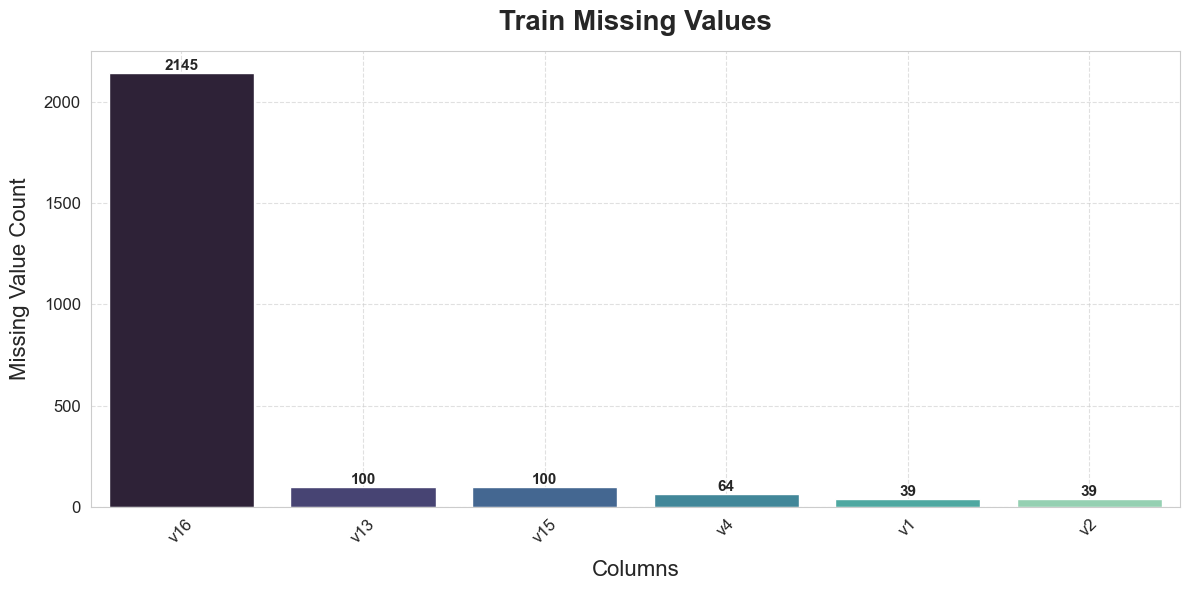

In [870]:
print("\n=== Missing values in original TRAIN data ===")
print(df_train.isnull().mean().round(4).mul(100).sort_values(ascending=False))
plot_missing_counts(df_train, "Train Missing Values")

### Define Target Variable
- Specifies the column(s) that the model will predict.

In [871]:
target_variable = 'classLabel'

### Identify Numeric and Categorical Columns
- Lists columns separately by type (numeric and categorical).
- Excludes the target column and column `v17` from the predictor lists to prevent data leakage.

In [872]:
numeric_cols_train = df_train.select_dtypes(include=[np.number]).columns.tolist()
if target_variable in numeric_cols_train:
    numeric_cols_train.remove(target_variable)
    numeric_cols_train.remove('v17')

categorical_cols_train = df_train.select_dtypes(include=['object']).columns.tolist()
if target_variable in categorical_cols_train:
    categorical_cols_train.remove(target_variable)

### Apply Numeric Imputation Methods
- Applies each numeric imputation method (Iterative, KNN, and single-value) on numeric columns.

In [873]:
df_train_numeric_iterative = impute_numeric_iterative(df_train.copy(), numeric_cols_train)
df_train_numeric_knn       = impute_numeric_knn(df_train.copy(), numeric_cols_train)
df_train_numeric_single    = single_imputation(df_train.copy())

Column: v2 | Method: Median | Value: 28.67
Column: v13 | Method: Median | Value: 120.00
Column: v15 | Method: Median | Value: 1200000.00


### Apply ML-based Categorical Imputation
- Applies an ML-based categorical imputation method using a Random Forest Classifier.

In [874]:
df_train_categorical_ml = impute_categorical_ml(df_train.copy(), categorical_cols_train, target_variable)

### Merge Imputed Data
- Creates complete datasets by merging the numeric imputation results (Iterative, KNN, Single-value) with the categorical imputation outputs.

In [875]:
df_train_imputed_iterative = combine_imputed(df_train_numeric_iterative,
                                             df_train_categorical_ml,
                                             categorical_cols_train)

df_train_imputed_knn = combine_imputed(df_train_numeric_knn,
                                       df_train_categorical_ml,
                                       categorical_cols_train)

df_train_imputed_single = combine_imputed(df_train_numeric_single,
                                          df_train_categorical_ml,
                                          categorical_cols_train)

### Checking no Missing Values After Imputation

In [876]:
print("\n=== Missing values in Iterative-imputed TRAIN ===")
print(df_train_imputed_iterative.isnull().sum().sort_values(ascending=False))
plot_missing_counts(df_train_imputed_iterative, "Iterative-Imputed Train")

print("\n=== Missing values in KNN-imputed TRAIN ===")
print(df_train_imputed_knn.isnull().sum().sort_values(ascending=False))
plot_missing_counts(df_train_imputed_knn, "KNN-Imputed Train")

print("\n=== Missing values in Single-imputed TRAIN ===")
print(df_train_imputed_single.isnull().sum().sort_values(ascending=False))
plot_missing_counts(df_train_imputed_single, "Single-Imputed Train")


=== Missing values in Iterative-imputed TRAIN ===
v1            0
v2            0
v17           0
v16           0
v15           0
v14           0
v13           0
v12           0
v11           0
v10           0
v9            0
v8            0
v7            0
v6            0
v5            0
v4            0
v3            0
classLabel    0
dtype: int64
Iterative-Imputed Train: No missing values.

=== Missing values in KNN-imputed TRAIN ===
v1            0
v2            0
v17           0
v16           0
v15           0
v14           0
v13           0
v12           0
v11           0
v10           0
v9            0
v8            0
v7            0
v6            0
v5            0
v4            0
v3            0
classLabel    0
dtype: int64
KNN-Imputed Train: No missing values.

=== Missing values in Single-imputed TRAIN ===
v1            0
v2            0
v17           0
v16           0
v15           0
v14           0
v13           0
v12           0
v11           0
v10           0
v9          

- Dectionary for easy comparison combines original and imputed datasets

In [877]:
imputation_datasets = {
    "Original": df_train,
    "Iterative": df_train_imputed_iterative,
    "KNN": df_train_imputed_knn,
    "Single": df_train_imputed_single,
}

In [878]:
numeric_cols = df_train.select_dtypes(include=["number"]).columns.tolist()

### Visualizing Numeric Data Distributions:
- Plots histograms for numeric columns across datasets (Original, Iterative, KNN, and Single-value) along with their density distributions.

- Note that `v13` and `v15` are essentially the same data on different scales.

- The visualizations reveal how the data behaves: some columns follow a normal distribution, others are skewed with outliers, and notably, `v5` and `v17` do not follow any clear distribution.


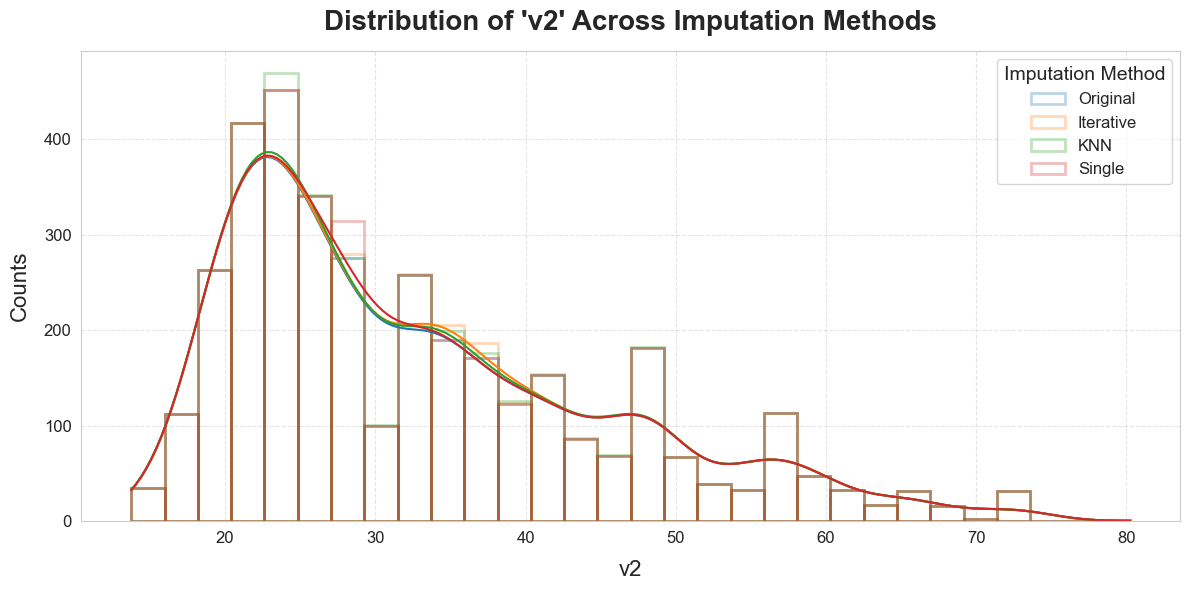

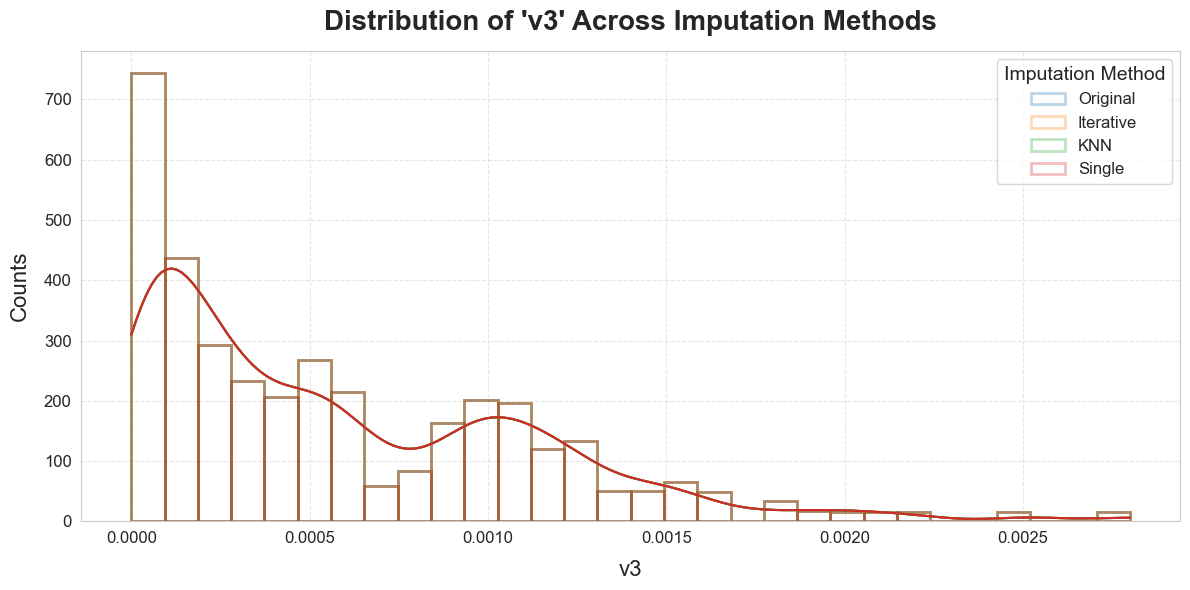

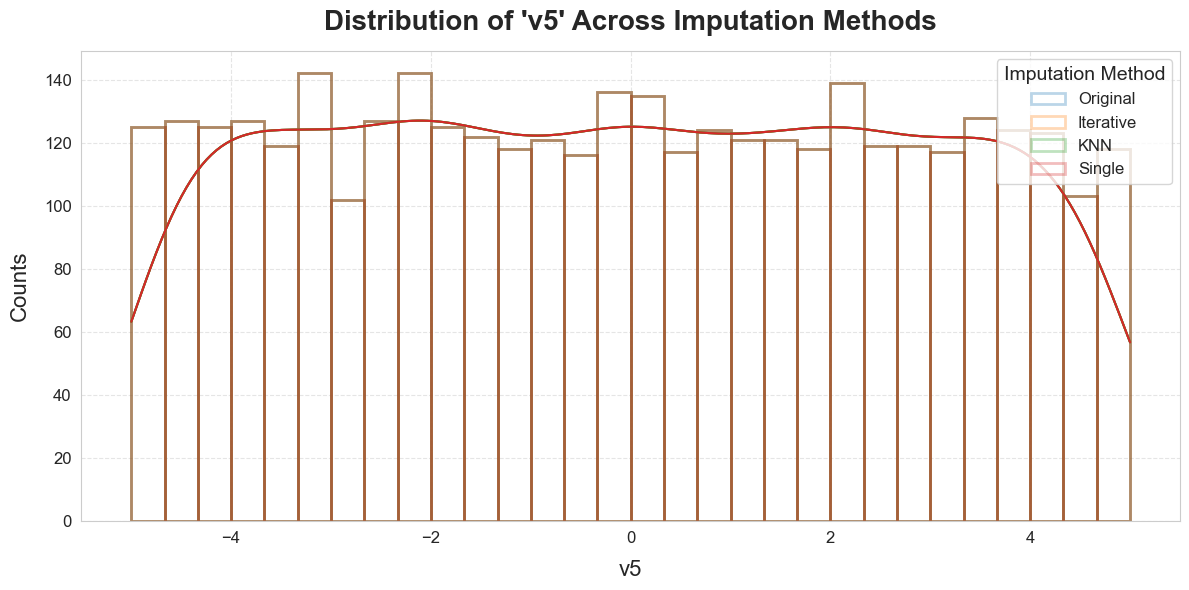

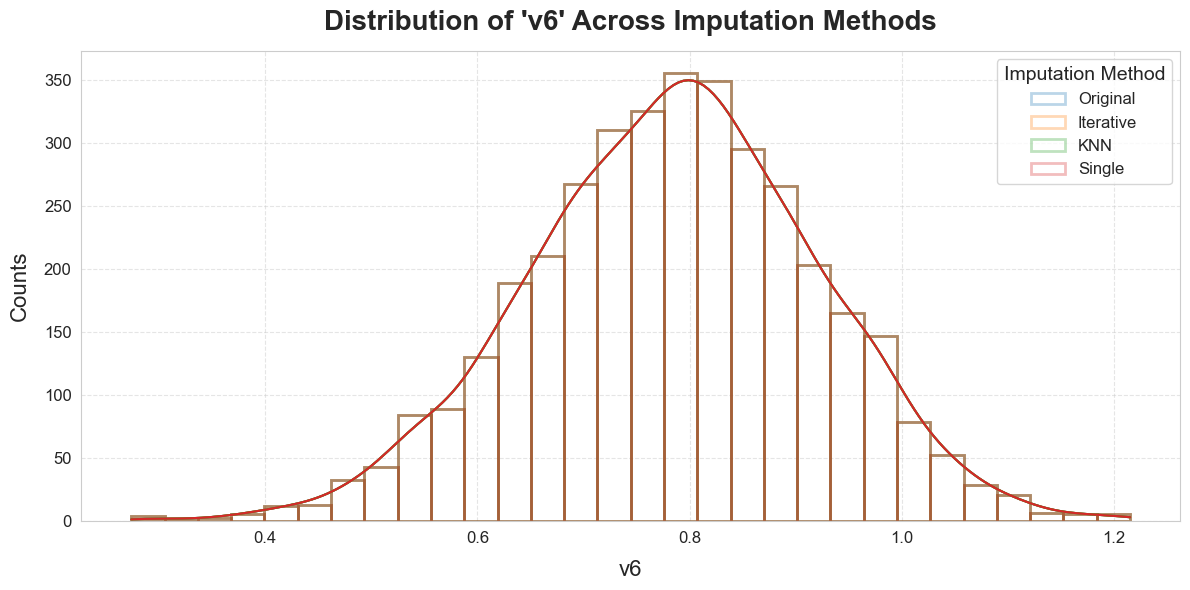

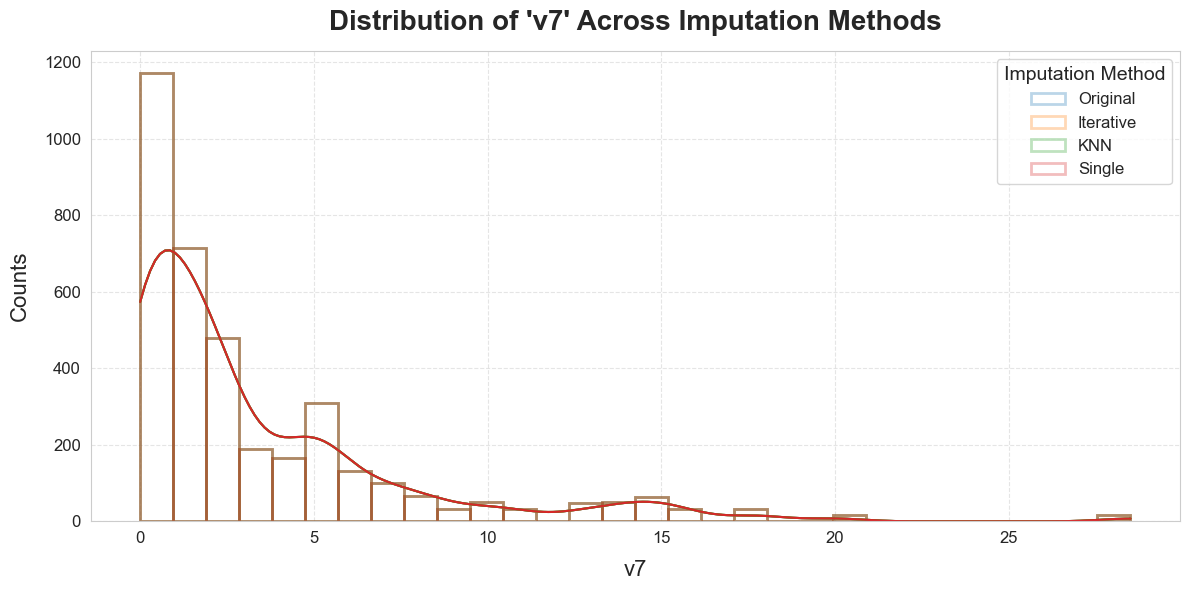

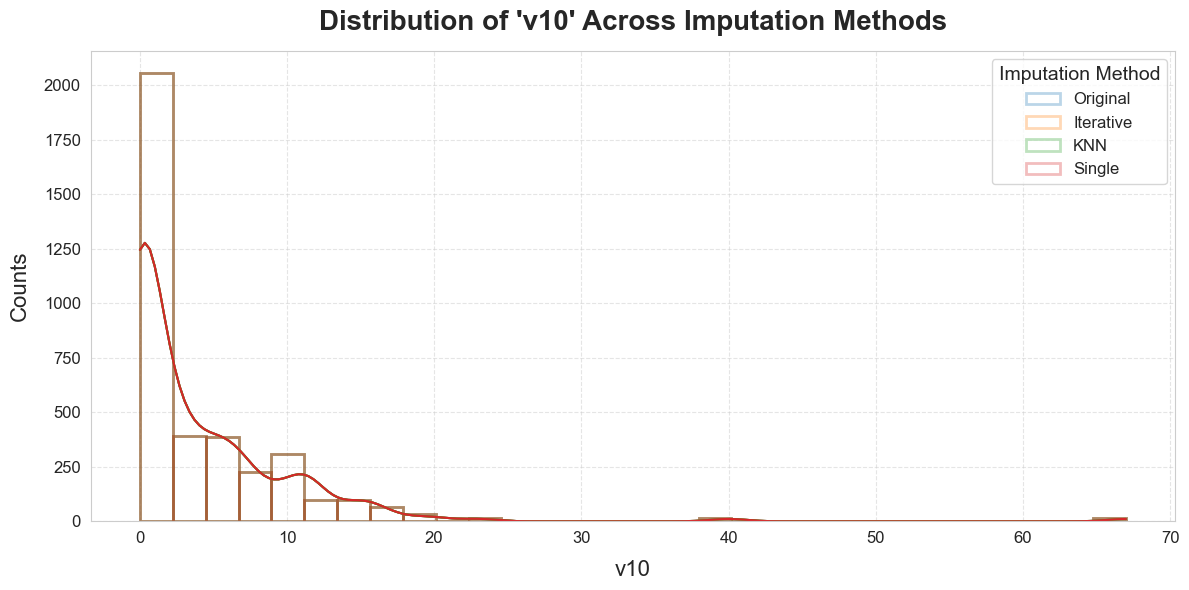

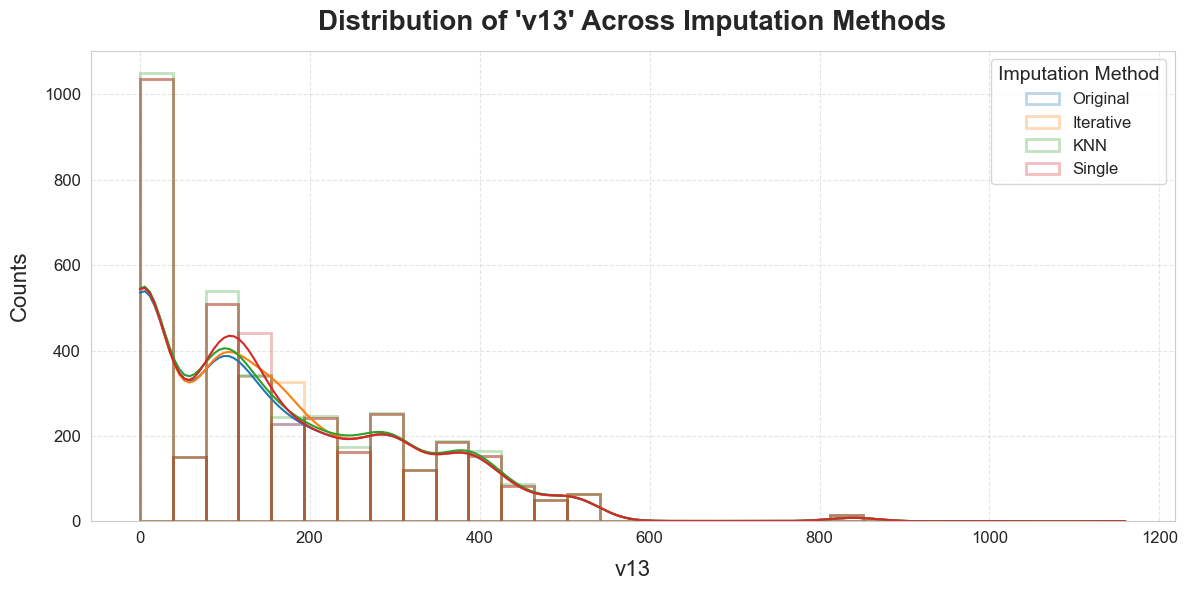

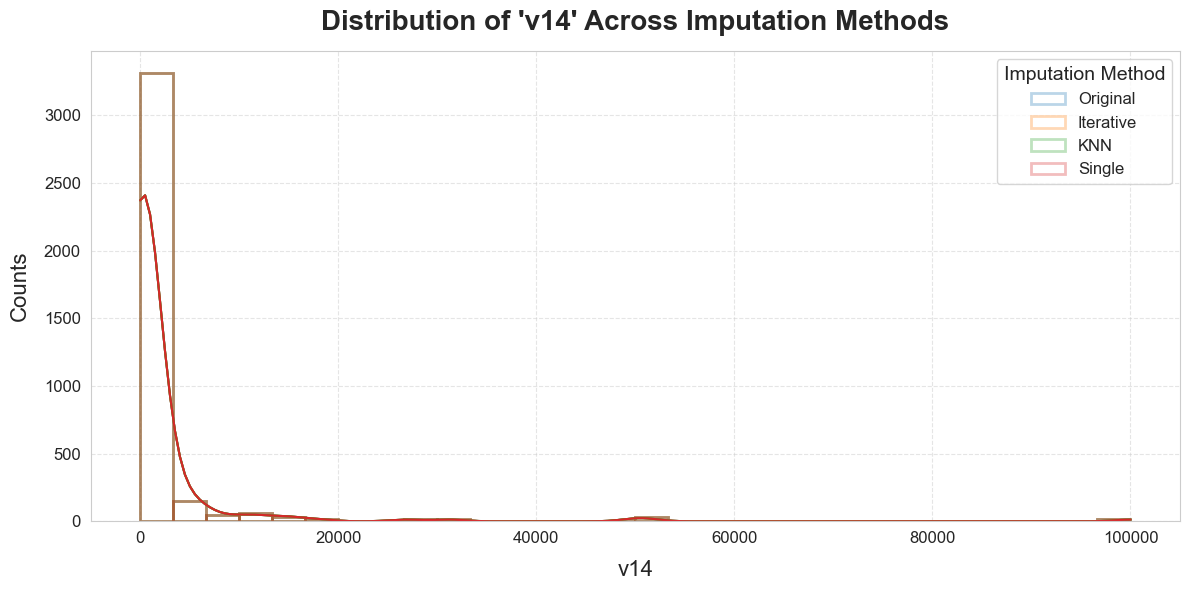

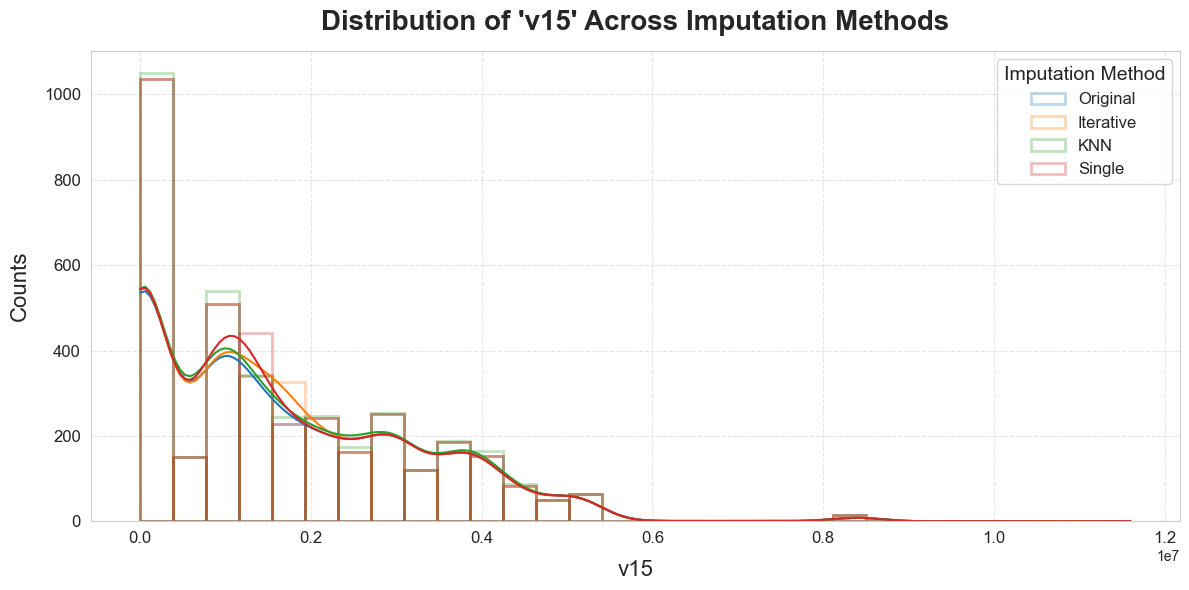

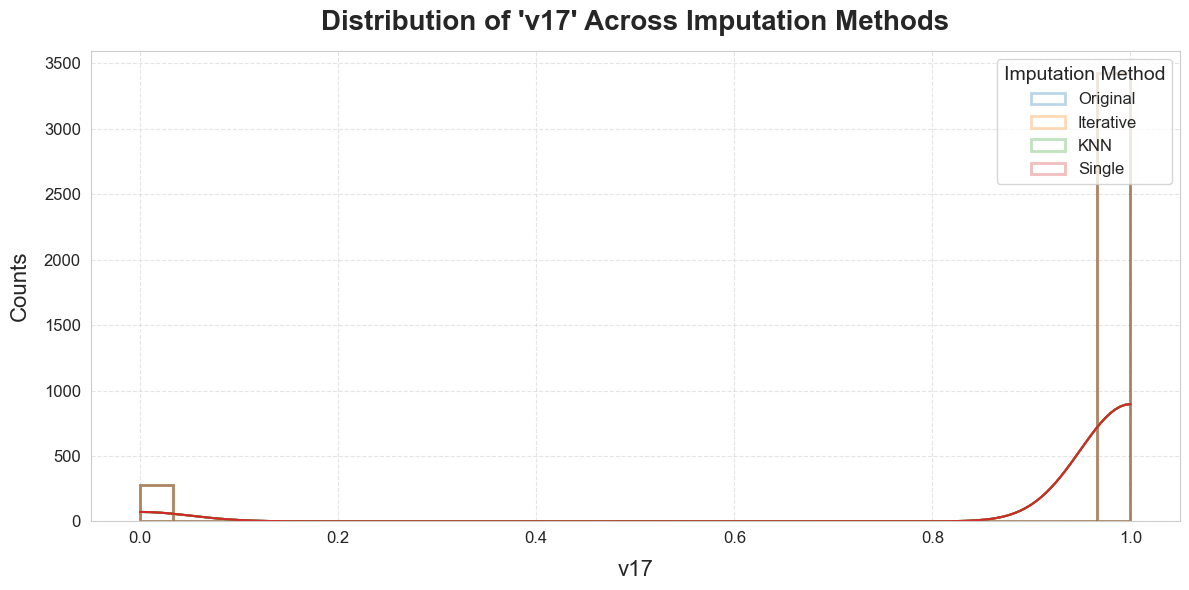

In [879]:
for col in numeric_cols:
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")

    for name, dataset in imputation_datasets.items():
        sns.histplot(
            dataset[col].dropna(),
            kde=True,
            bins=30,
            label=name,
            alpha=0.3,
            linewidth=2,
            edgecolor='black',
            fill=False,
            #stat='density'
        )

    plt.title(f"Distribution of '{col}' Across Imputation Methods", fontsize=20, fontweight='bold', pad=15)
    plt.xlabel(col, fontsize=16, labelpad=10)
    plt.ylabel("Counts", fontsize=16, labelpad=10)
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title="Imputation Method", fontsize=12, title_fontsize=14, loc='upper right')

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [880]:
categorical_cols = df_train.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

### Visualizing Categorical Data Distributions
- Compares frequency distributions for categorical variables across datasets.

- No clear pattern is evident for `v8`, `v9`, `v11`, and `v16` (f and t remain ambiguous).

- `v17` and `classLabel` are effectively the same information, just represented in different data types.

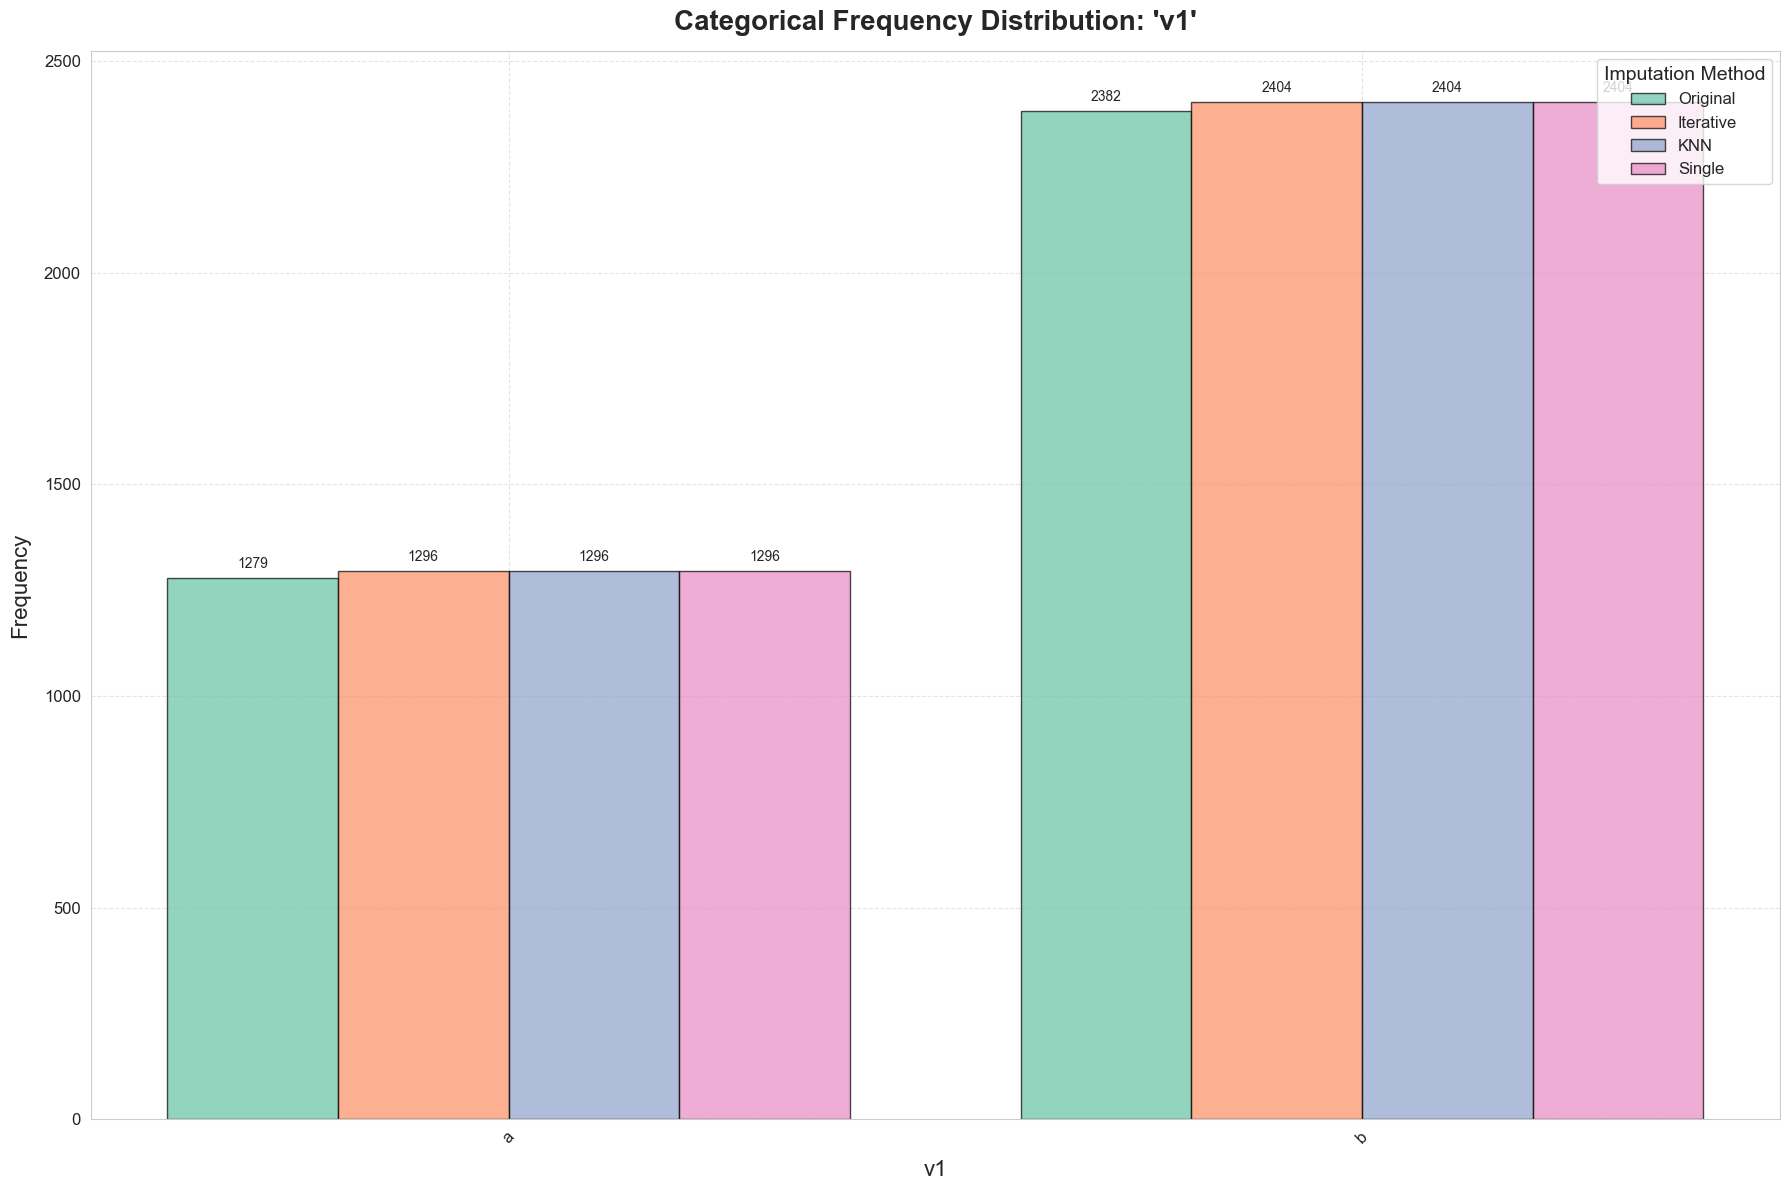

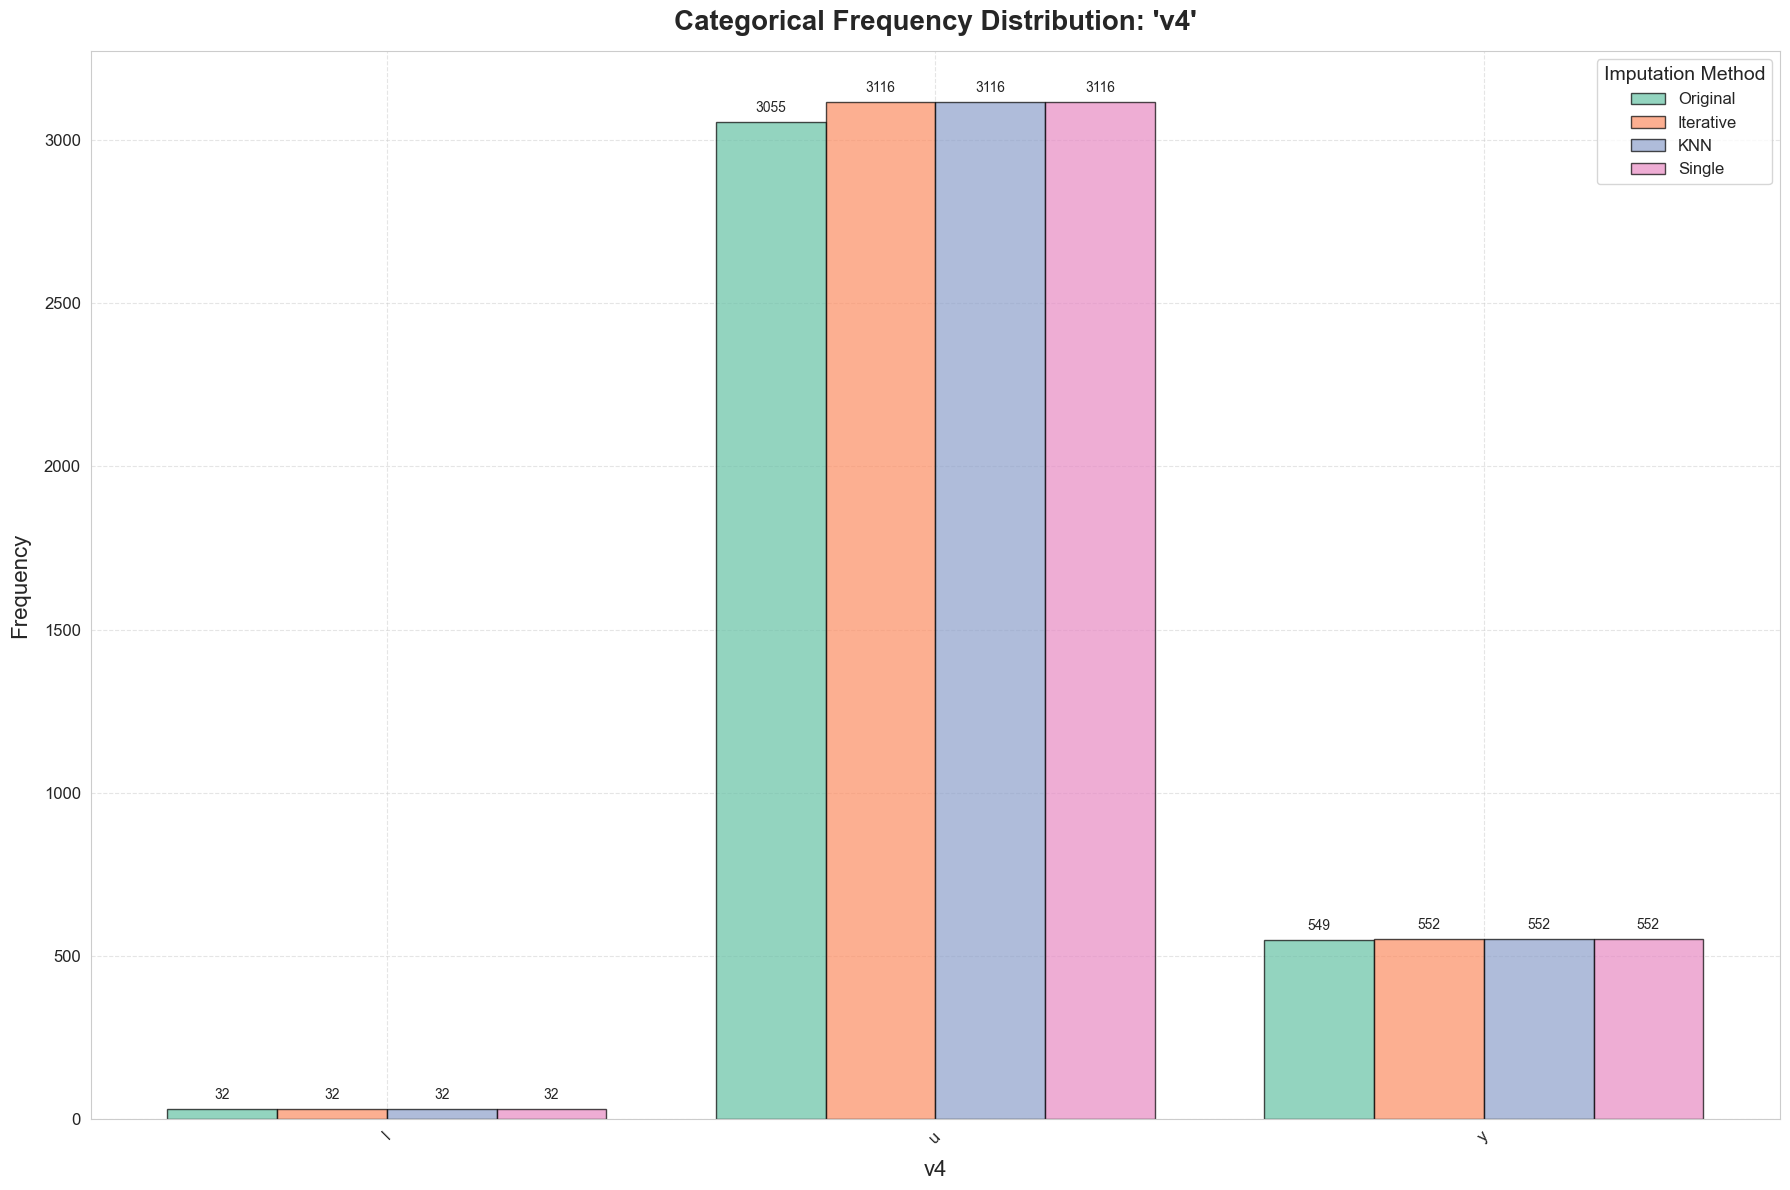

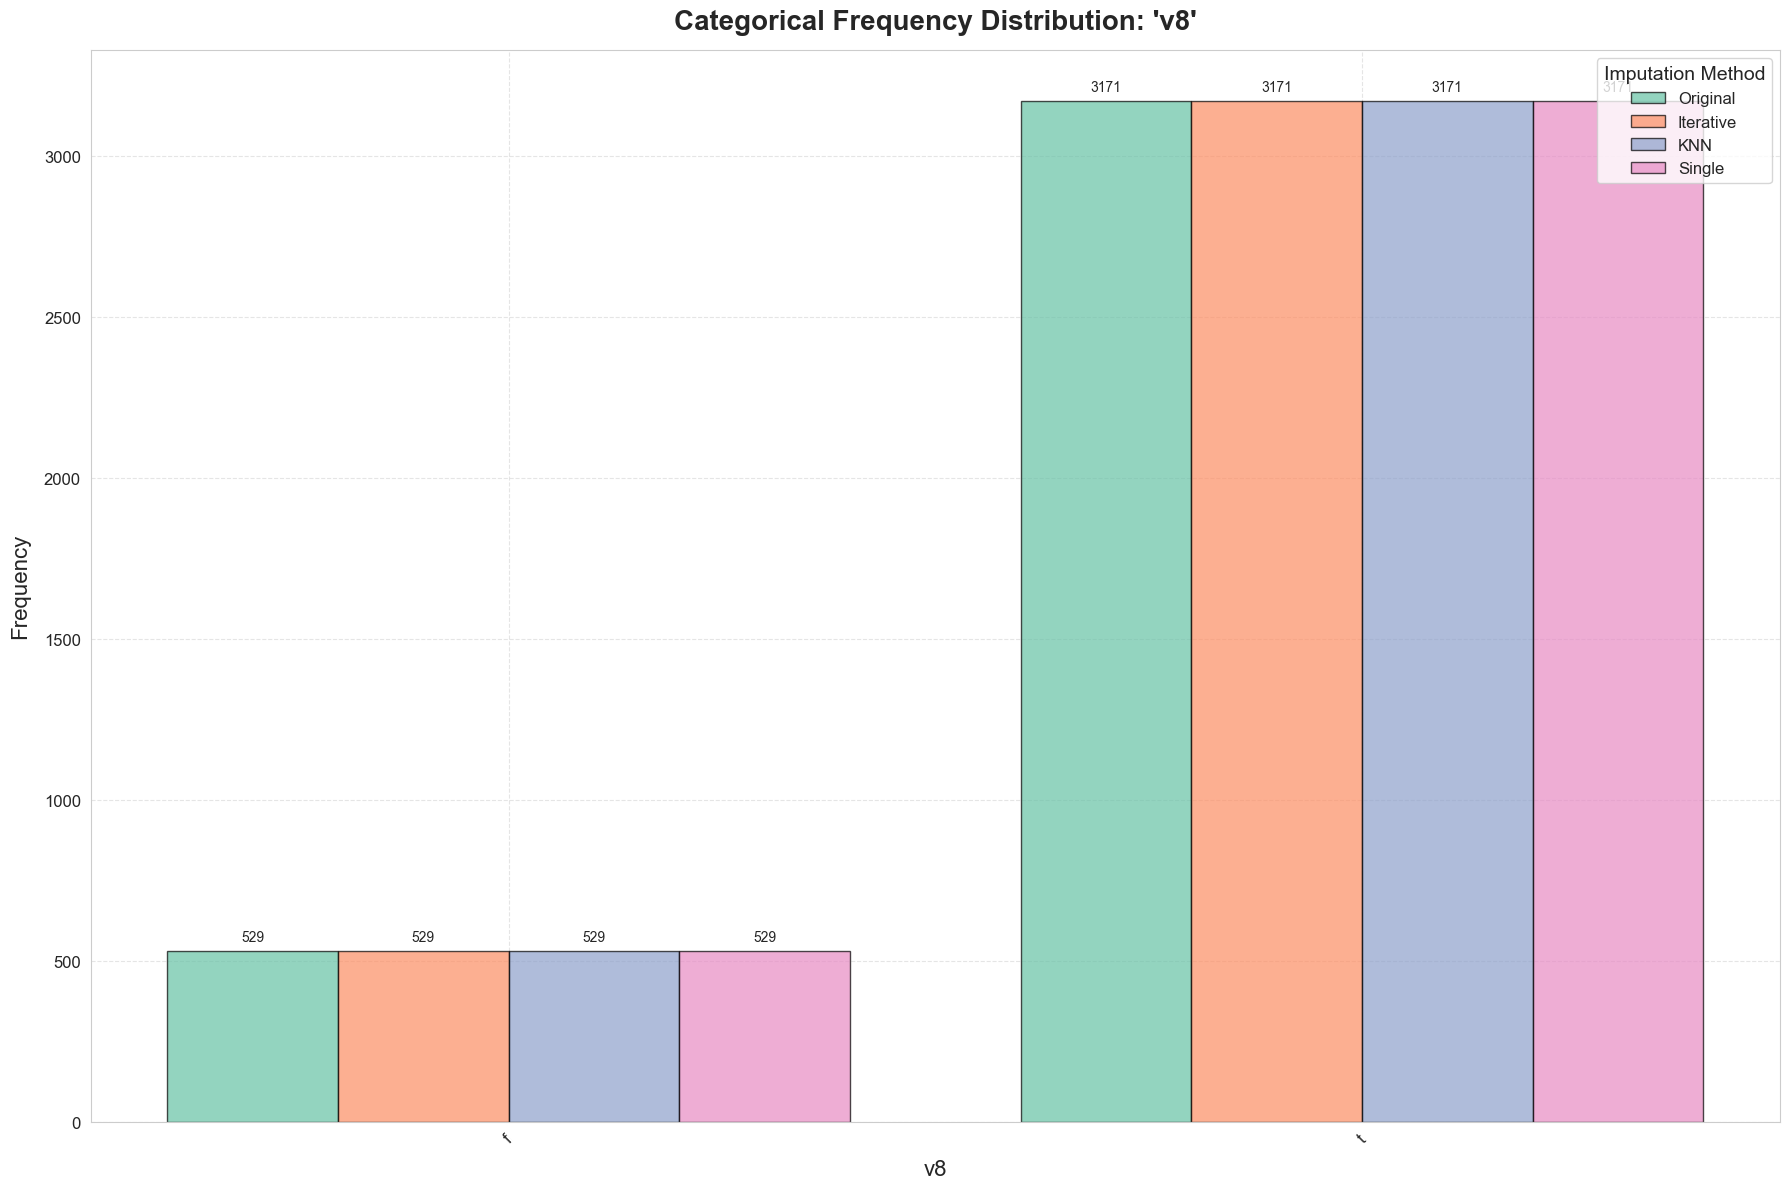

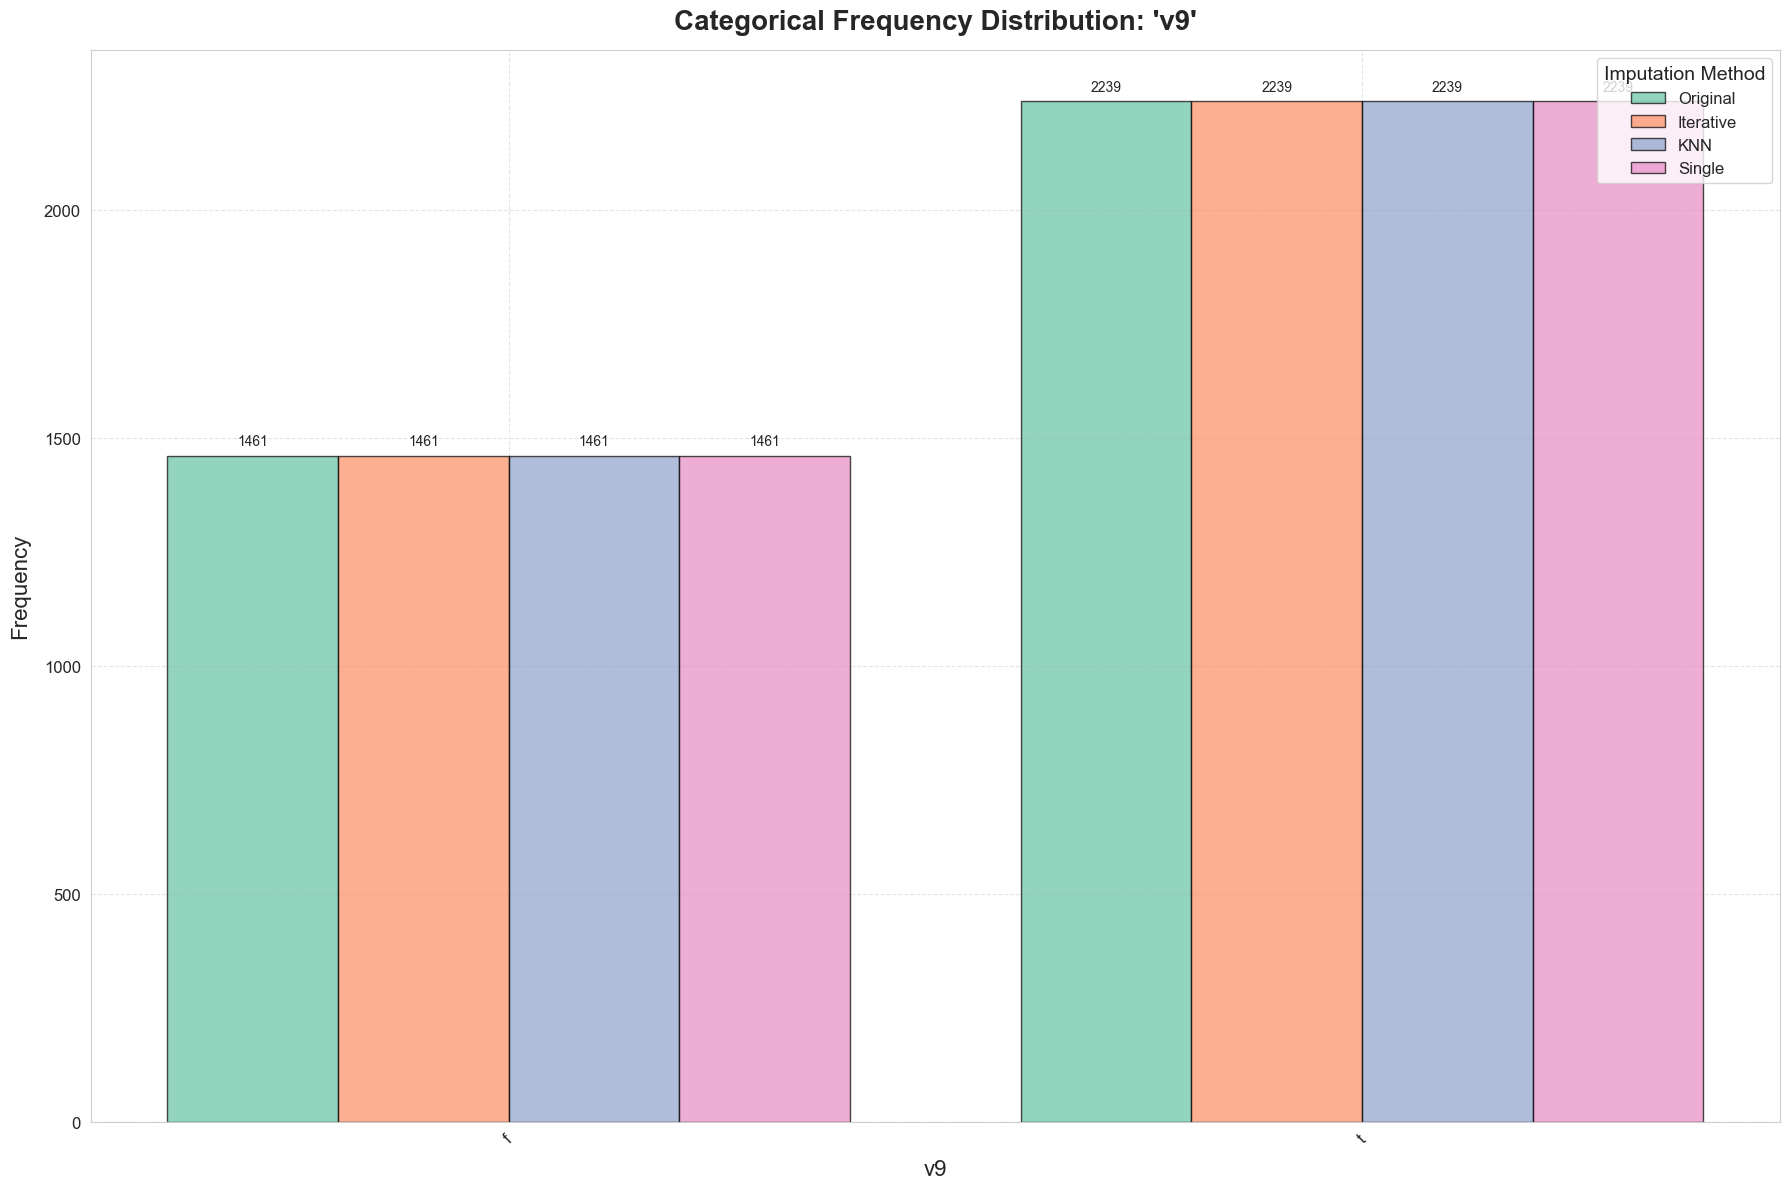

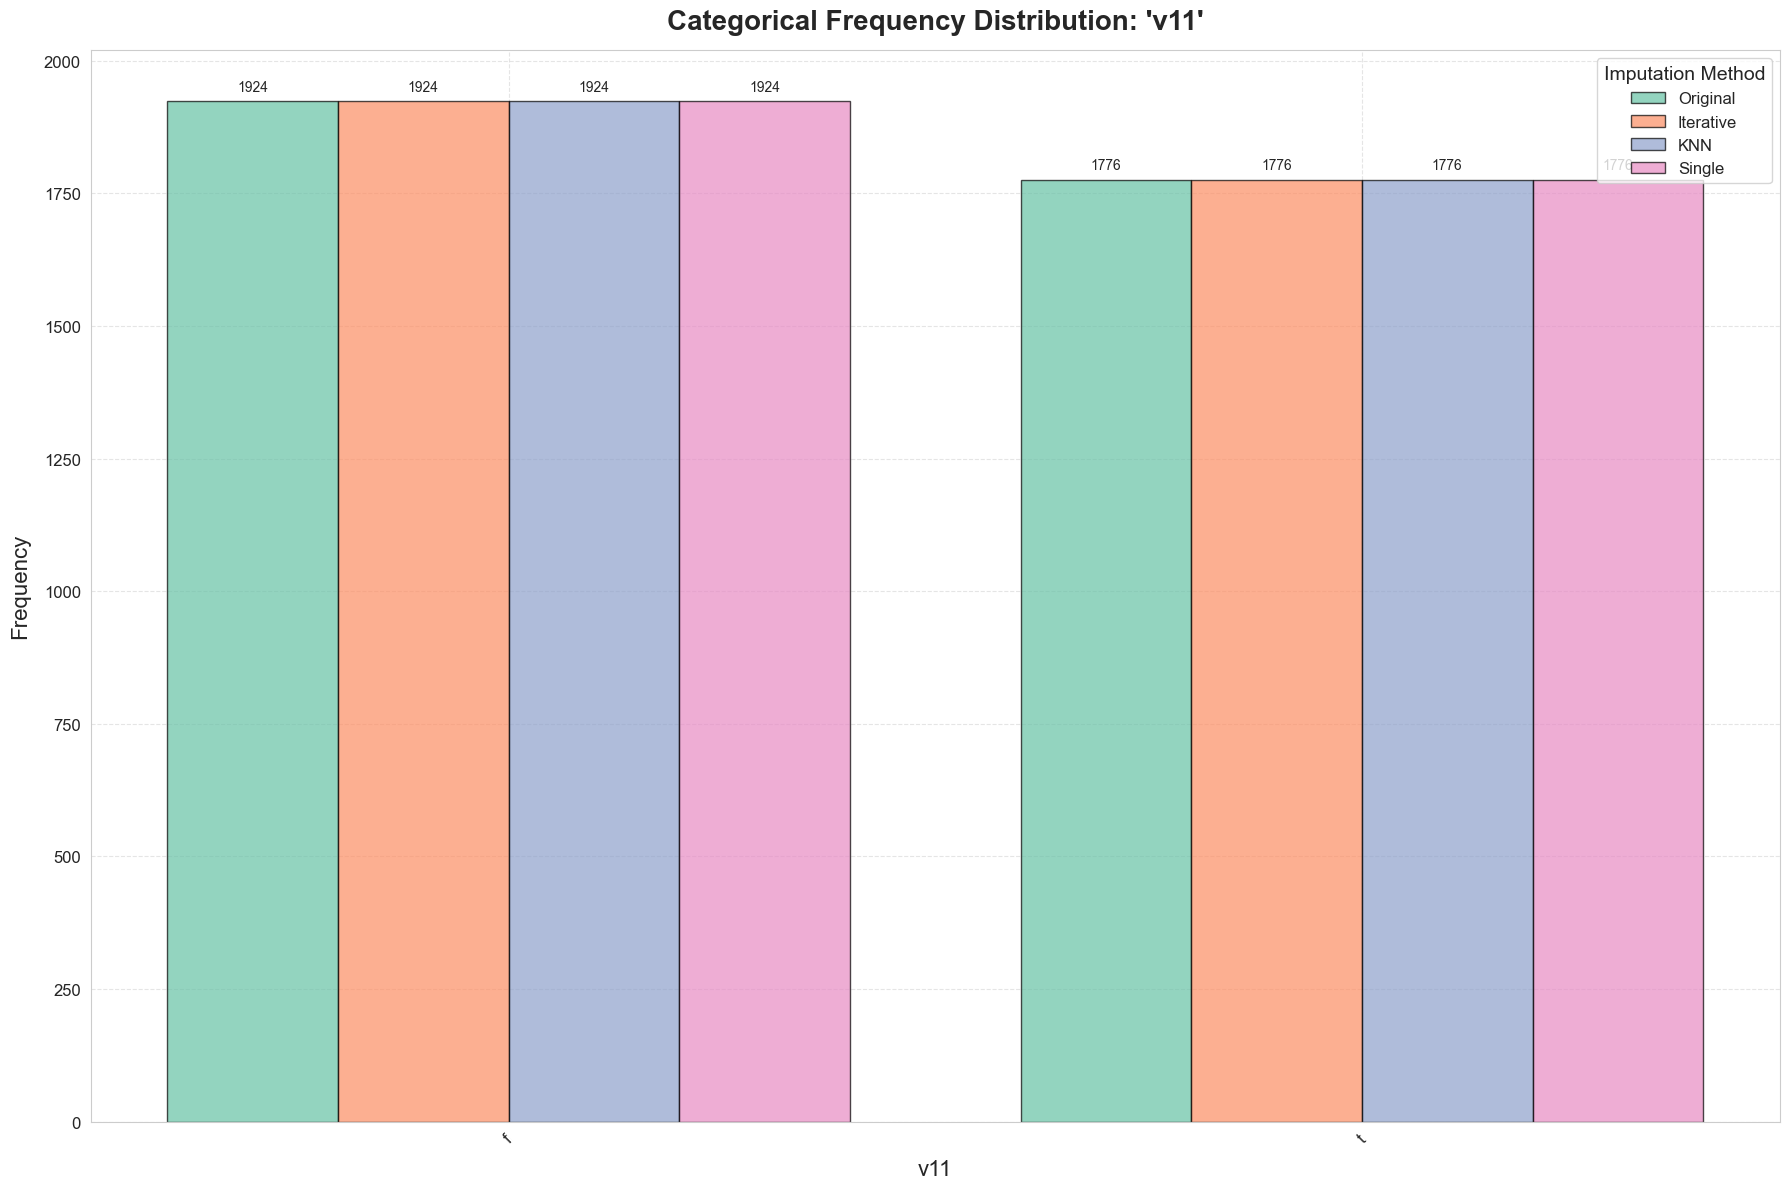

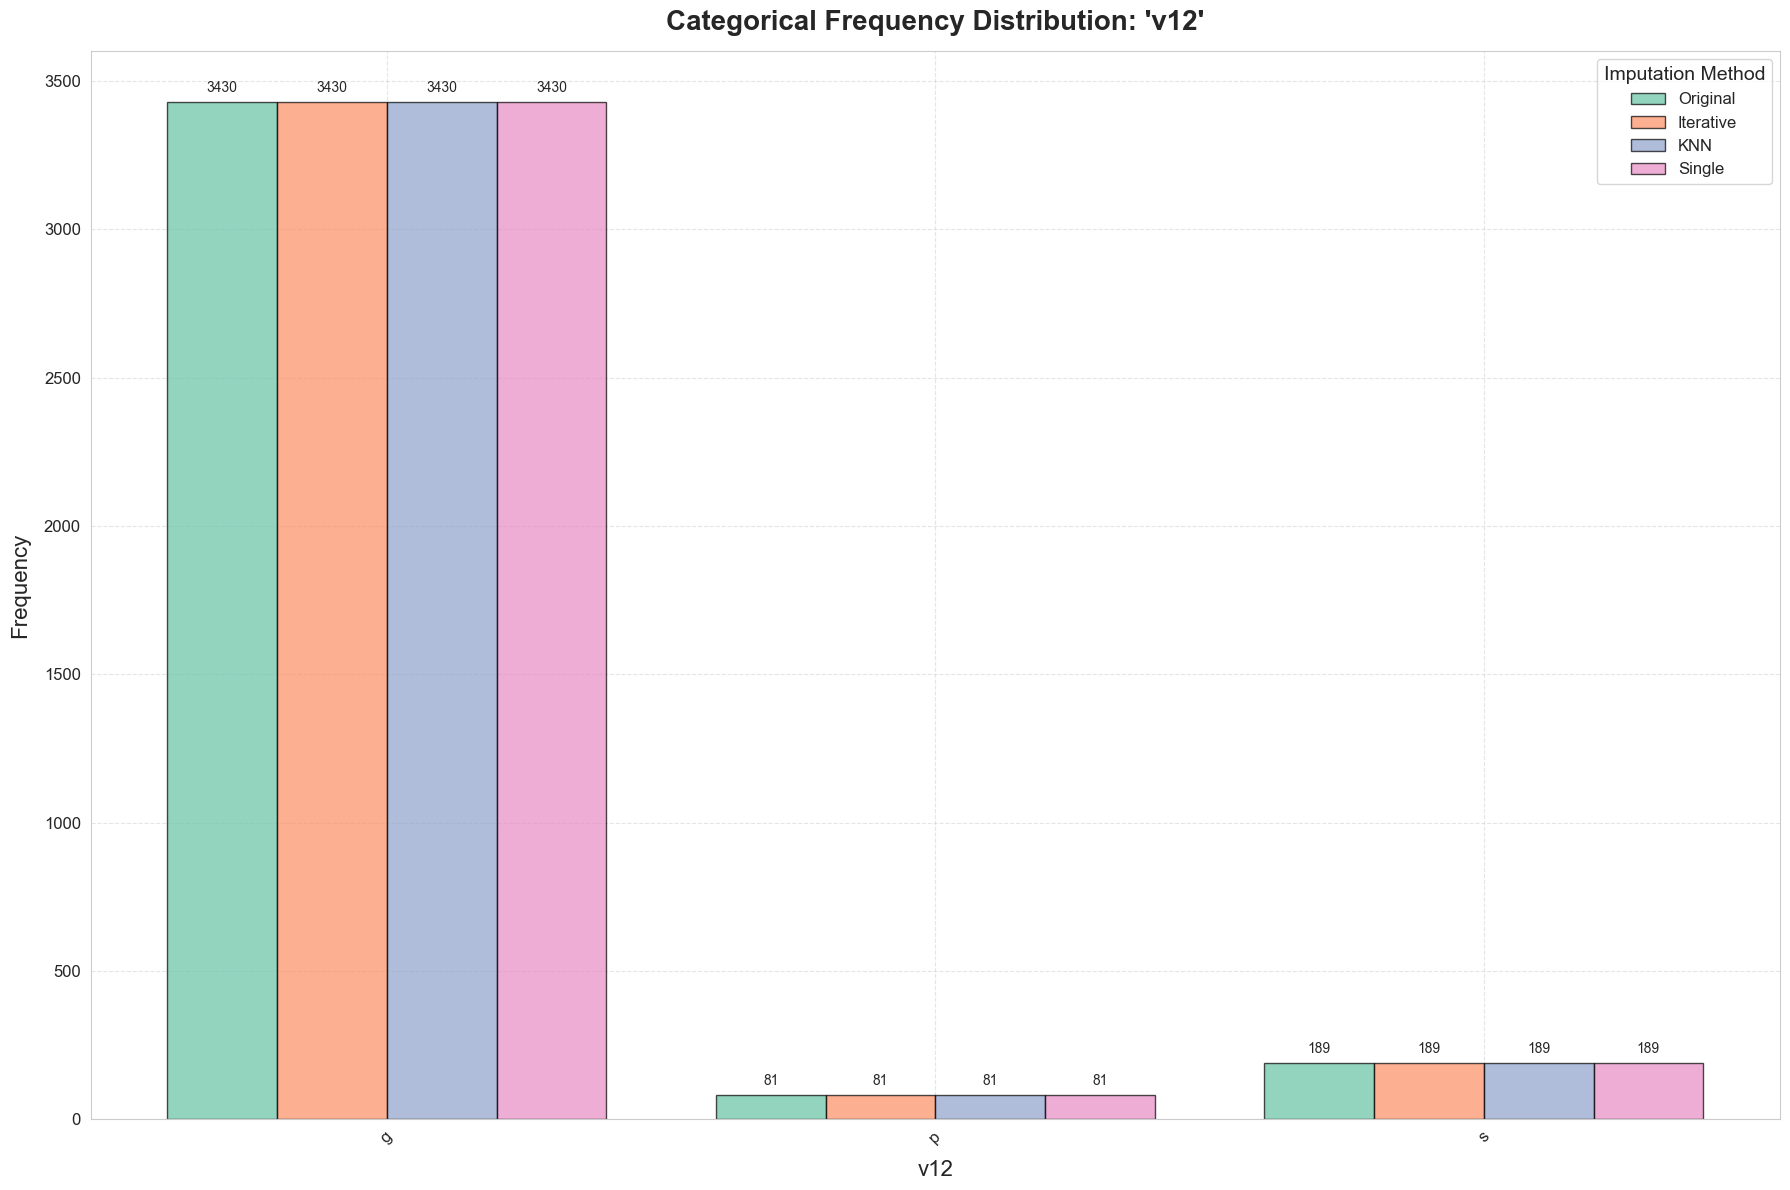

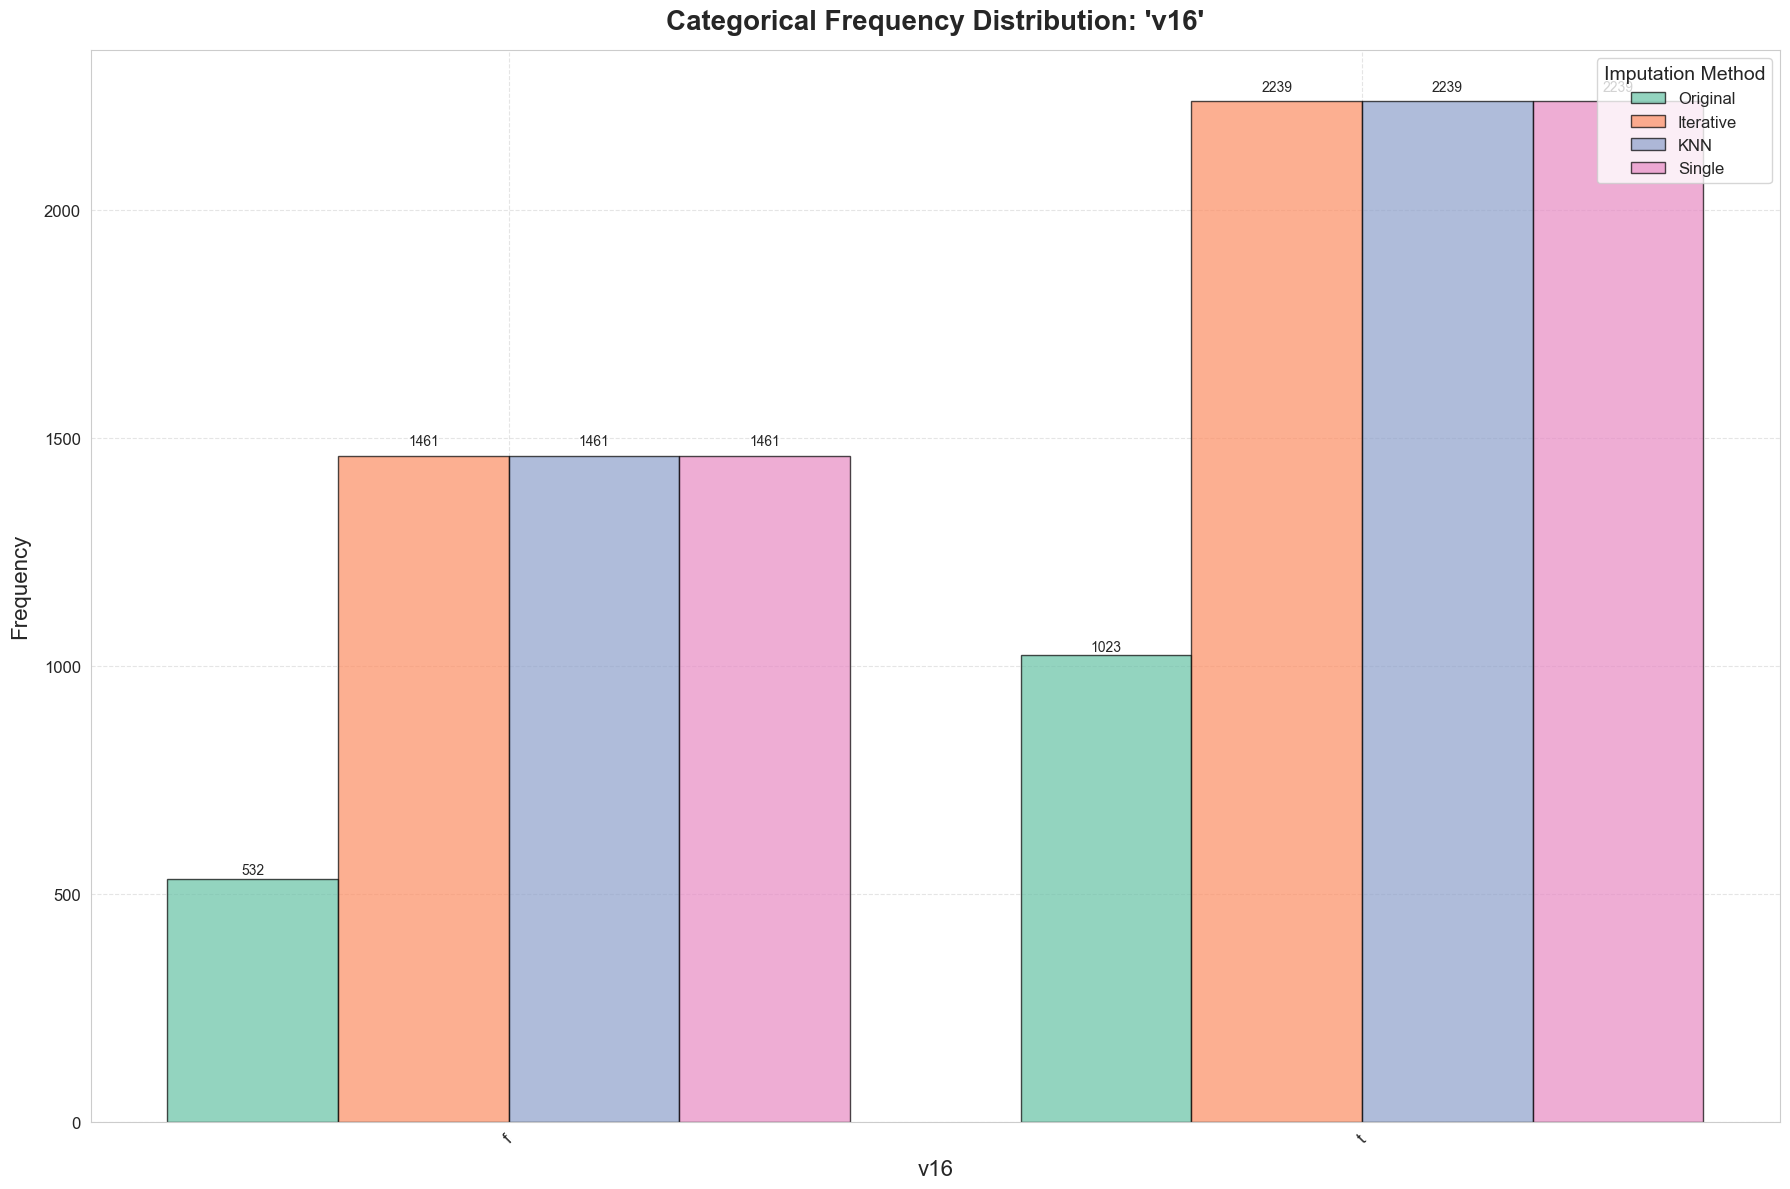

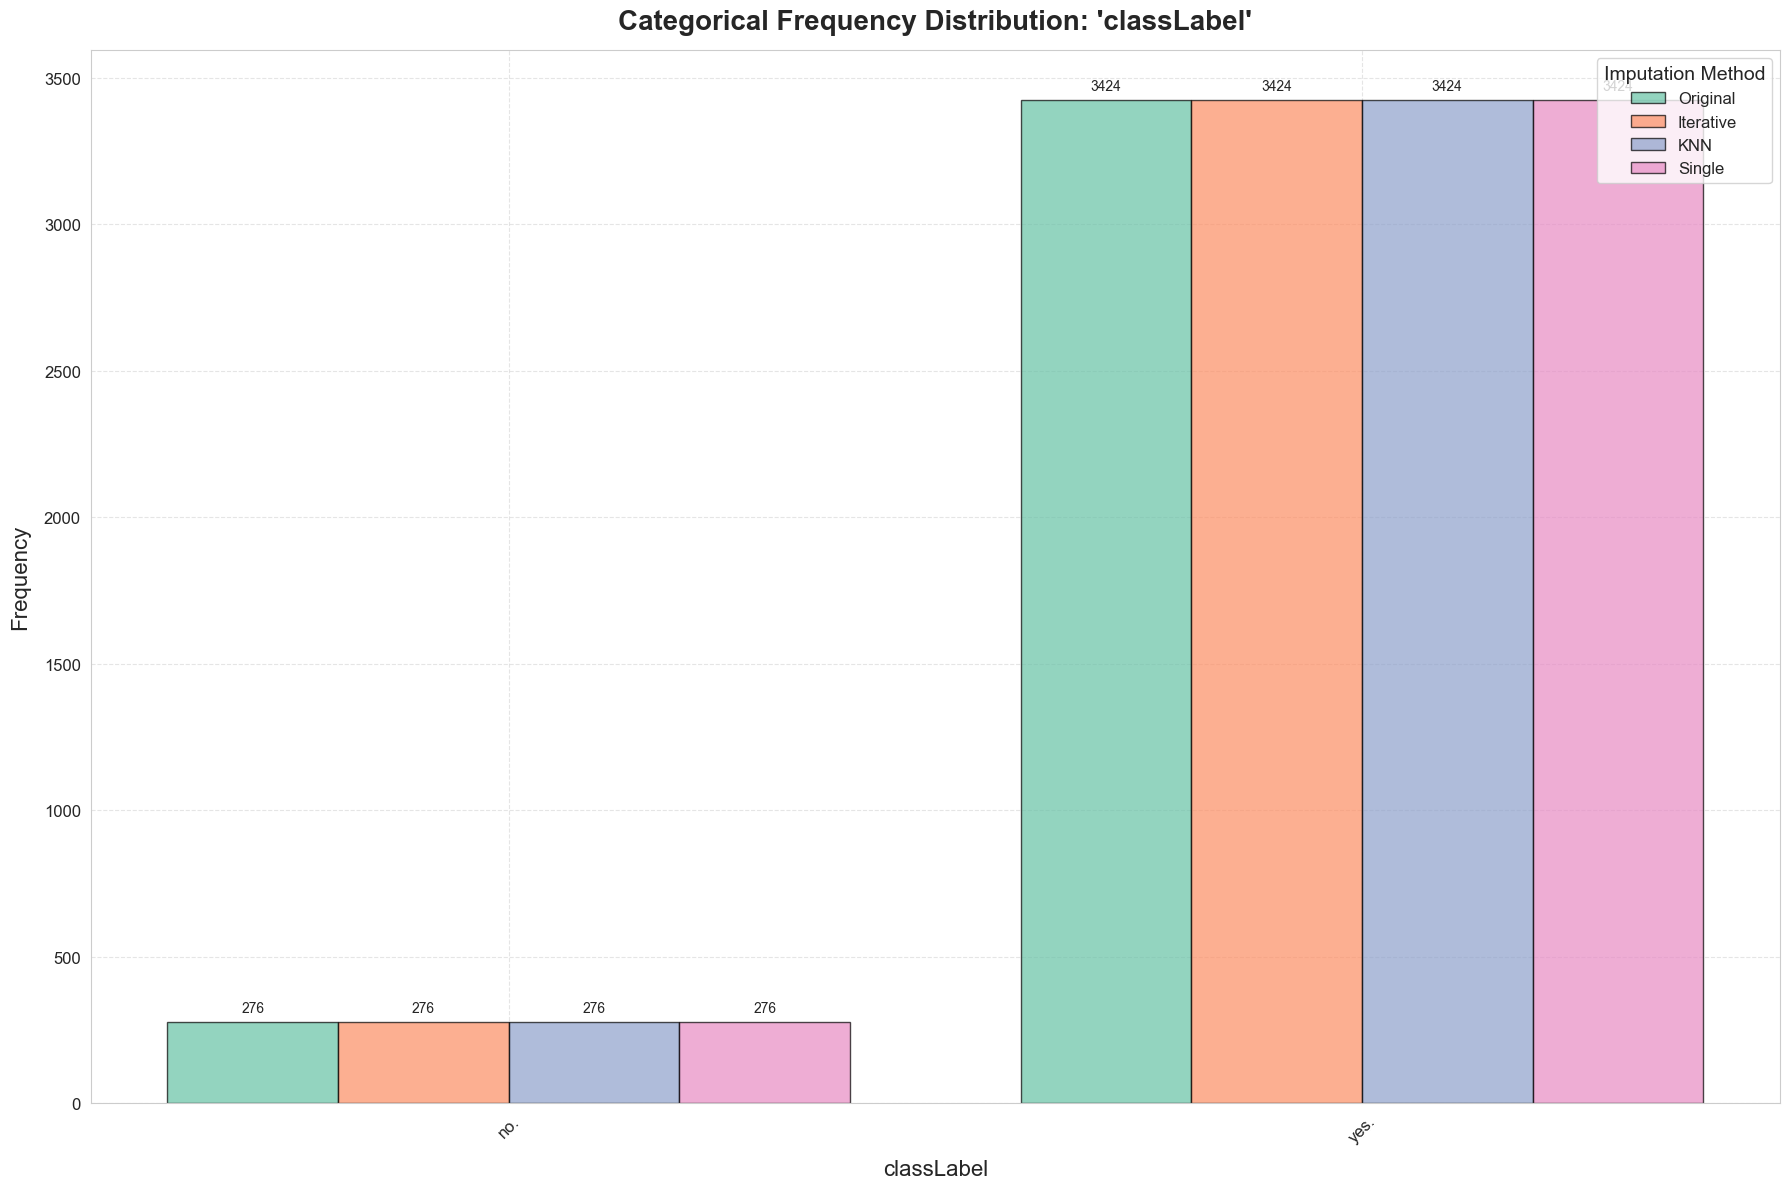

In [881]:
for col in categorical_cols:
    plt.figure(figsize=(18, 12))
    sns.set_style("whitegrid")

    color_palette = sns.color_palette("Set2", n_colors=len(imputation_datasets))
    bar_width = 0.2
    x_labels = sorted(set().union(*[set(dataset[col].dropna().unique()) for dataset in imputation_datasets.values()]))
    x_positions = np.arange(len(x_labels))

    for idx, (name, dataset) in enumerate(imputation_datasets.items()):
        counts = dataset[col].value_counts(dropna=False).reindex(x_labels, fill_value=0)
        bar_pos = x_positions + (idx - len(imputation_datasets) / 2) * bar_width + bar_width / 2
        plt.bar(
            bar_pos,
            counts.values,
            width=bar_width,
            label=name,
            color=color_palette[idx],
            edgecolor='black',
            alpha=0.7,
            fill = True,
        )
        # Add value labels
        for x, y in zip(bar_pos, counts.values):
            plt.text(x, y + max(counts.values) * 0.01, str(y), ha='center', fontsize=10)

    plt.title(f"Categorical Frequency Distribution: '{col}'", fontsize=20, fontweight='bold', pad=15)
    plt.xlabel(col, fontsize=16, labelpad=10)
    plt.ylabel("Frequency", fontsize=16, labelpad=10)

    plt.xticks(ticks=x_positions, labels=[str(x) for x in x_labels], rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title="Imputation Method", fontsize=12, title_fontsize=14, loc='upper right')

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [882]:
train_final = df_train_imputed_iterative.copy()

### Encoding Categorical Variables

- Encodes categorical variables into numeric labels using `LabelEncoder`.

- Mathematically speaking: $Category \rightarrow \text{Integer} \ (0, 1, 2, 3, \dots)$


In [883]:
encode_cols = ['v1','v4','v8','v9','v11','v12','v16','classLabel']
encoders = {}
for col in encode_cols:
    le_col = LabelEncoder()
    train_final[col] = le_col.fit_transform(train_final[col].astype(str))
    encoders[col] = le_col  # store to apply on test data

### Correlation Heatmap

- Examines linear relationships between features using the Pearson correlation coefficient.

- Mathematically speaking:

$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2}\sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

- `{v13, v15}` and `{v17, classLabel}` are effectively the same, as proven by their perfect correlation ($r = 1$).
- Only `v8` and, to a lesser extent, `v6` show any notable correlation with our target.
- Final note: While this isn't a regression task, it's insightful to explore relationships between features and the target.


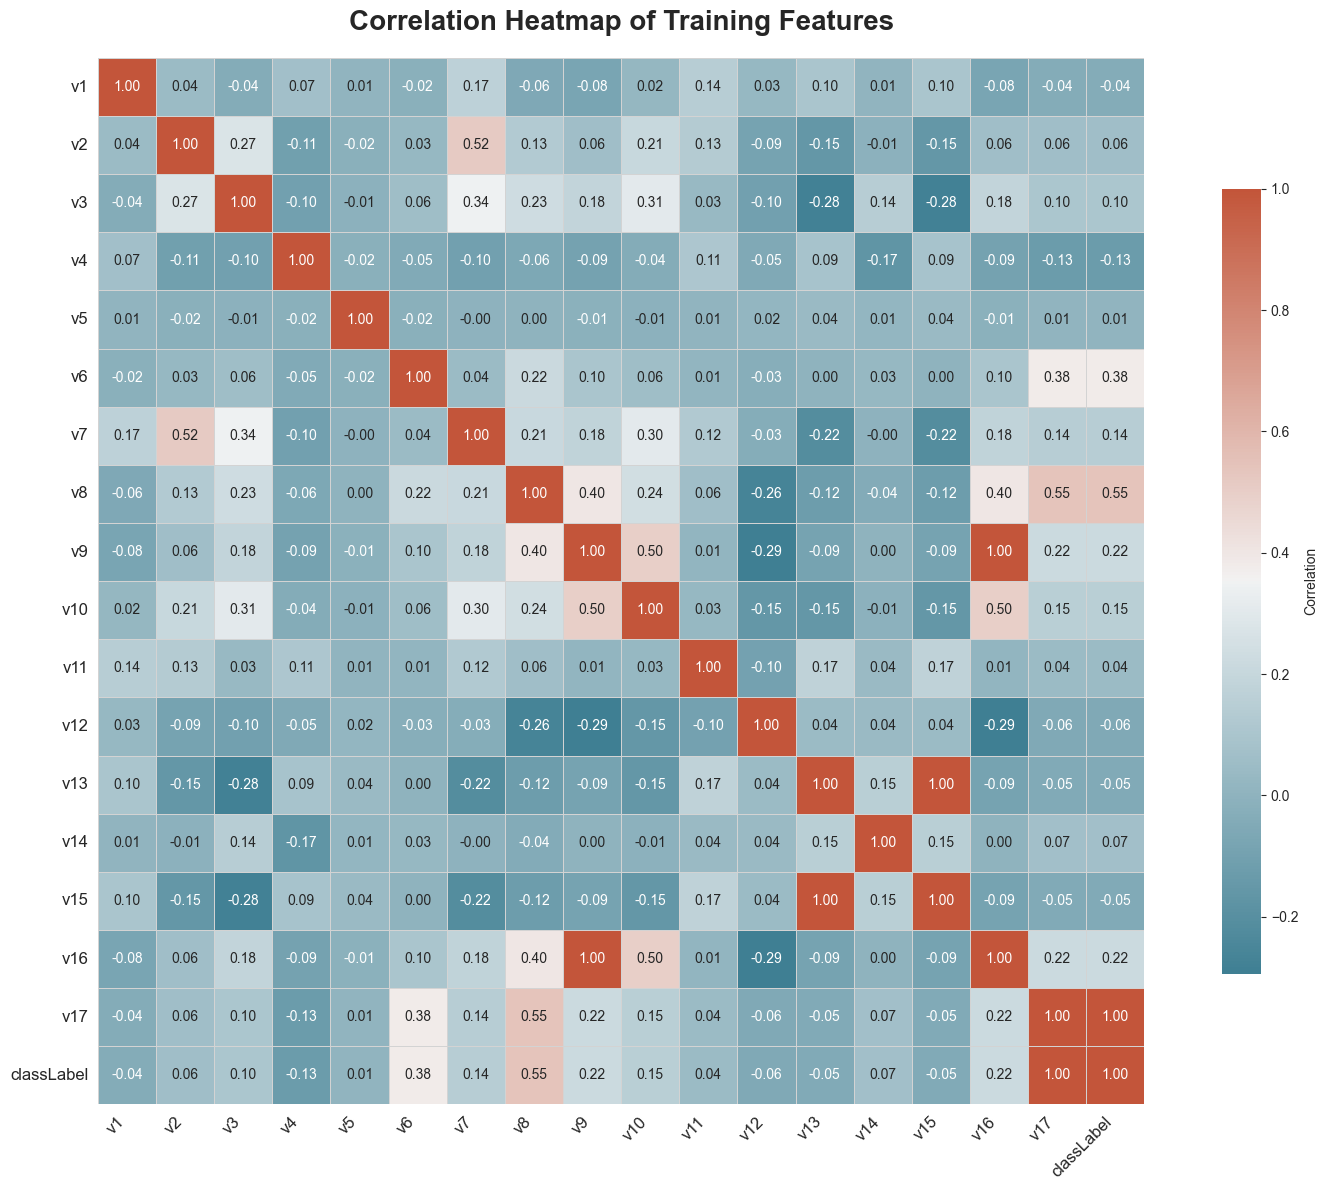

In [884]:
plt.figure(figsize=(16, 12))
sns.set_style("whitegrid")

# Define a good diverging color palette
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with annotation and formatting
sns.heatmap(
    train_final.corr(),
    annot=True,
    fmt=".2f",
    cmap=cmap,
    linewidths=0.5,
    linecolor='lightgray',
    square=True,
    cbar_kws={'shrink': 0.75, 'label': 'Correlation'},
    annot_kws={'fontsize': 10}
)

plt.title("Correlation Heatmap of Training Features", fontsize=20, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()


### Dropping Specified Columns

Based on our analysis, I drop the following columns from the features:

- **`v17`**: Identical to the target.
- **`v16`**: Over 50% missing values and essentially redundant with `v9`.
- **`v15`**: Duplicative information since `v13` is already included.


In [885]:
X = train_final.drop(['classLabel', 'v17', 'v16', 'v15'], axis=1, errors='ignore') 
y = train_final['classLabel']

In [886]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}")
print(f"Train labels: {y_train.value_counts(normalize=True)}")
print(f"Validation labels: {y_val.value_counts(normalize=True)}")

Train shape: (2960, 14), Validation shape: (740, 14)
Train labels: classLabel
1    0.925338
0    0.074662
Name: proportion, dtype: float64
Validation labels: classLabel
1    0.925676
0    0.074324
Name: proportion, dtype: float64


### Hyperparameter Tuning (Random Forest)

- Choice of Random Forest classifier fits well with the categorical data observed here.

- I use `GridSearchCV` to systematically test different hyperparameter combinations, aiming to maximize accuracy and prevent overfitting.

- **Accuracy** is defined as:
$$
Accuracy = \frac{\text{Correct Predictions}}{\text{Total Predictions}}
$$

- **Random Forest Mechanism**: A Random Forest makes predictions by aggregating the outputs of multiple decision trees. For a given input \( x \), the predicted class \( $\hat{y}$ \) is determined by majority vote:

$$
\hat{y} = \operatorname{mode}\{ h_1(x), h_2(x), \dots, h_N(x) \}
$$
where \( $h_i(x) $\) is the prediction of the \($ i^{th} $\) tree and \( N \) is the total number of trees.


In [887]:
param_grid = {
    'max_features':      [1, 3, 10],
    'min_samples_split': [2, 3, 10],
    'min_samples_leaf':  [1, 3, 10],
    'bootstrap':         [False],
    'n_estimators':      [100, 300],
    'criterion':         ["entropy", "gini"],
    'class_weight':      [None, 'balanced']  # <-- handle class imbalance
}

cv = StratifiedShuffleSplit(n_splits=10, test_size=0.30, random_state=15)

rfc = RandomForestClassifier()
grid = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=cv,
    verbose=1
)
grid.fit(X_train, y_train)

print("Best Score:", grid.best_score_)
print("Best Params:", grid.best_params_)
print("Best Estimator:", grid.best_estimator_)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Best Score: 0.9813063063063063
Best Params: {'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}
Best Estimator: RandomForestClassifier(bootstrap=False, max_features=1, min_samples_split=3,
                       n_estimators=300)


In [888]:
rfc_best = grid.best_estimator_
y_pred_val = rfc_best.predict(X_val)

### Performance Metrics & Confusion Matrix
- The confusion matrix is an essential tool showing True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).

- Classification reports provide key metrics: Precision, Recall, and F1-Score.

- Mathematically:

  - **Precision:**  
    $$
    \text{Precision} = \frac{TP}{TP + FP}
    $$
  - **Recall:**  
    $$
    \text{Recall} = \frac{TP}{TP + FN}
    $$
  - **F1-Score:**  
    $$
    \text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
    $$

- In our validation set (740 samples), the model achieved roughly 98% accuracy with no evident overfitting.
- The precision for both classes (no, yes) is about 98%—meaning that on average, 2 out of 100 samples are misclassified.
- While these results are decent, especially since I've ensured no data leakage by dropping the target column and `v17`, caution is needed in critical applications (e.g., bank card scam detection) where even small misclassification rates can be costly.
- Overall, the results are promising and can be further refined and confirmed during testing.



=== Confusion Matrix ===
            Predicted No  Predicted Yes
Actual No             44             11
Actual Yes             0            685

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        55
           1       0.98      1.00      0.99       685

    accuracy                           0.99       740
   macro avg       0.99      0.90      0.94       740
weighted avg       0.99      0.99      0.98       740

Accuracy: 0.9851
Mean Absolute Error: 0.0149


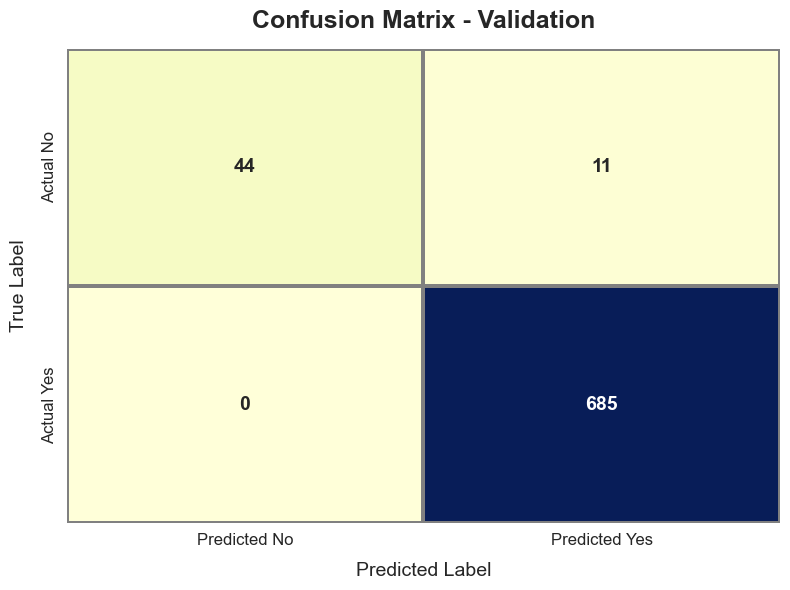

In [889]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix values
conf_mat_val = confusion_matrix(y_val, y_pred_val)

# Print matrix nicely
print("\n=== Confusion Matrix ===")
print(pd.DataFrame(
    conf_mat_val,
    columns=["Predicted No", "Predicted Yes"],
    index=["Actual No", "Actual Yes"]
))

# Classification report
print("\n=== Classification Report ===")
print(classification_report(y_val, y_pred_val))

# Accuracy and MAE
print(f"Accuracy: {accuracy_score(y_val, y_pred_val):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_val, y_pred_val):.4f}")

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

sns.heatmap(
    conf_mat_val,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    cbar=False,
    linewidths=1.5,
    linecolor='gray',
    xticklabels=["Predicted No", "Predicted Yes"],
    yticklabels=["Actual No", "Actual Yes"],
    annot_kws={"fontsize": 14, "fontweight": "bold"}
)

plt.title("Confusion Matrix - Validation", fontsize=18, fontweight='bold', pad=15)
plt.xlabel("Predicted Label", fontsize=14, labelpad=10)
plt.ylabel("True Label", fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


### Feature Importance

- Assesses feature importance by measuring the decrease in accuracy when each feature is permuted.

- Mathematically:
  $$
  Importance_{feature,i} = Accuracy_{Original} - Accuracy_{permuted\ feature,i}
  $$
  
- It's good practice to determine which features have a significant impact on the model. Adding irrelevant features can negatively affect performance—for example, including computer type in email spam classification.


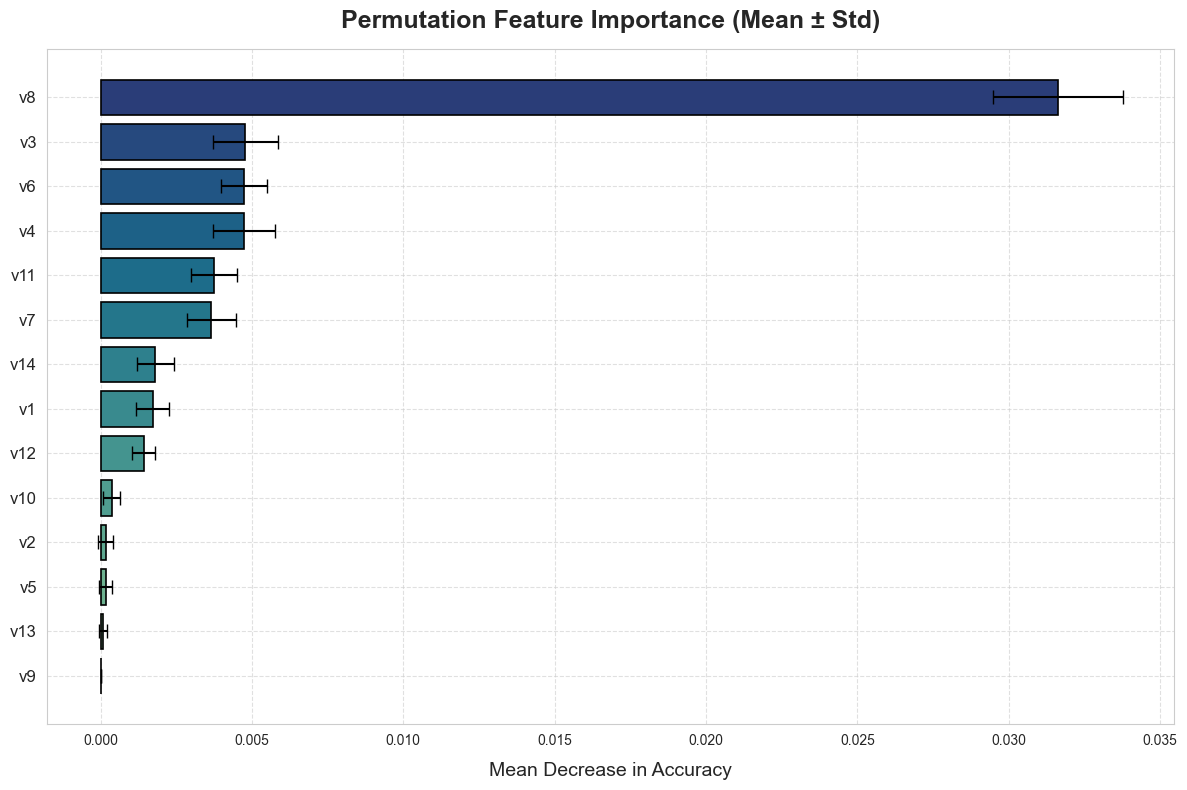

In [890]:
from sklearn.inspection import permutation_importance

perm_result = permutation_importance(grid, X_train, y_train,
                                     n_jobs=-1,
                                     n_repeats=30,
                                     random_state=131071,
                                     scoring='accuracy')

mean_importances = pd.Series(perm_result.importances_mean,index=X.columns)
std_importances  = pd.Series(perm_result.importances_std, index=X.columns)

sorted_idx      = np.argsort(mean_importances)
sorted_features = mean_importances.index[sorted_idx]
sorted_mean     = mean_importances[sorted_idx]
sorted_std      = std_importances[sorted_idx]

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Use a clean color palette
bar_colors = sns.color_palette("crest", len(sorted_features))

# Create the bar plot
plt.barh(
    y=range(len(sorted_features)),
    width=sorted_mean,
    xerr=sorted_std,
    align='center',
    color=bar_colors,
    edgecolor='black',
    capsize=5,
    linewidth=1.2
)

# Y-axis with feature names
plt.yticks(
    ticks=range(len(sorted_features)),
    labels=sorted_features,
    fontsize=12
)

# Axis labels and title
plt.xlabel("Mean Decrease in Accuracy", fontsize=14, labelpad=10)
plt.title("Permutation Feature Importance (Mean ± Std)", fontsize=18, fontweight='bold', pad=15)

# Grid and spacing
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Test Datasets Pre-Processing

- Applies the same pre-processing logic used on the training datasets to the test datasets.
- Ensures consistency in data transformation while preventing data leakage.
- Excludes the target column and redundant columns (like `v17`) from the features.


=== Missing values in original TEST data ===
v16           111
v1              3
v15             3
v13             3
v2              3
v4              2
v11             0
v17             0
v14             0
v12             0
v10             0
v9              0
v8              0
v7              0
v6              0
v5              0
v3              0
classLabel      0
dtype: int64


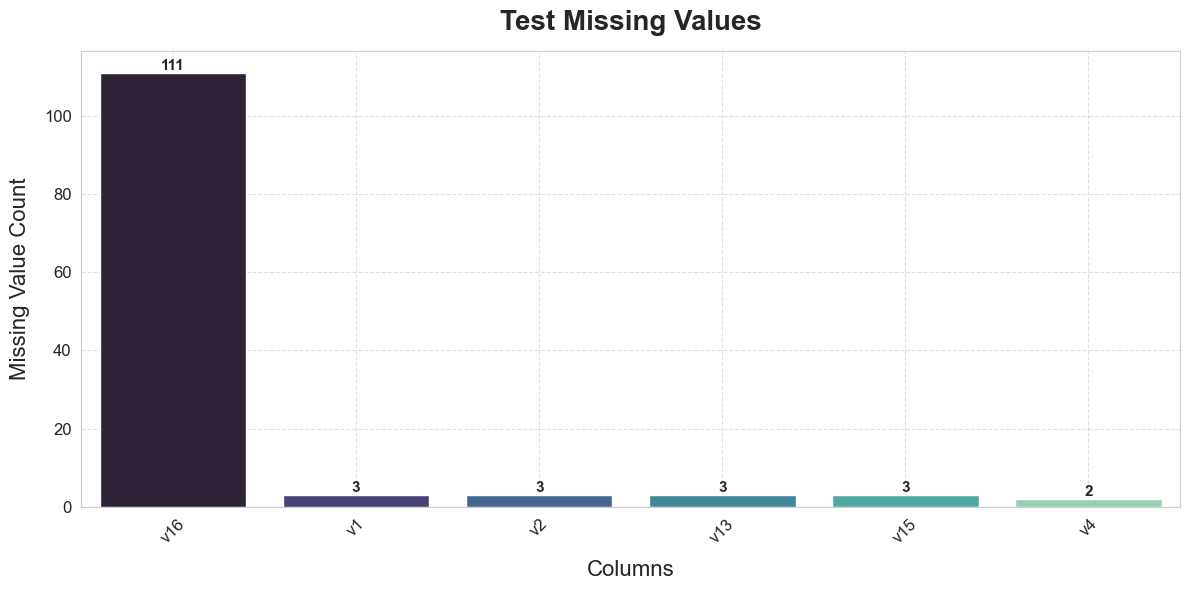

In [891]:
print("\n=== Missing values in original TEST data ===")
print(df_test.isnull().sum().sort_values(ascending=False))
plot_missing_counts(df_test, "Test Missing Values")

In [892]:
numeric_cols_test = df_test.select_dtypes(include=[np.number]).columns.tolist()
if target_variable in numeric_cols_test:
    numeric_cols_test.remove(target_variable)

categorical_cols_test = df_test.select_dtypes(include=['object']).columns.tolist()
if target_variable in categorical_cols_test:
    categorical_cols_test.remove(target_variable)

In [893]:
df_test_numeric_iterative = impute_numeric_iterative(df_test.copy(), numeric_cols_test)
df_test_categorical_ml    = impute_categorical_ml(df_test.copy(),
                                                  categorical_cols_test,
                                                  target_variable)

In [894]:
df_test_imputed = combine_imputed(df_test_numeric_iterative,
                                  df_test_categorical_ml,
                                  categorical_cols_test)

In [895]:
print("\n=== Missing values after test imputation ===")
print(df_test_imputed.isnull().sum().sort_values(ascending=False))
plot_missing_counts(df_test_imputed, "Test Imputed Missing Values")


=== Missing values after test imputation ===
v1            0
v2            0
v17           0
v16           0
v15           0
v14           0
v13           0
v12           0
v11           0
v10           0
v9            0
v8            0
v7            0
v6            0
v5            0
v4            0
v3            0
classLabel    0
dtype: int64
Test Imputed Missing Values: No missing values.


In [896]:
test_final = df_test_imputed.copy()
for col in encode_cols:
    if col in test_final.columns:
        test_final[col] = test_final[col].astype(str).map(
            lambda val: encoders[col].transform([val])[0]
            if val in encoders[col].classes_ 
            else 0
        )

### Correlation Heatmap (Test Data)

- Evaluates feature correlations in the test dataset.
- Some features now show stronger correlations with the target compared to the training set.

- Note: `v17` and the target column exhibit no real correlation, as `v17` remains just a chain of alternating values.

- This shift may affect model performance, but the model was trained on data that accommodates these relationships.


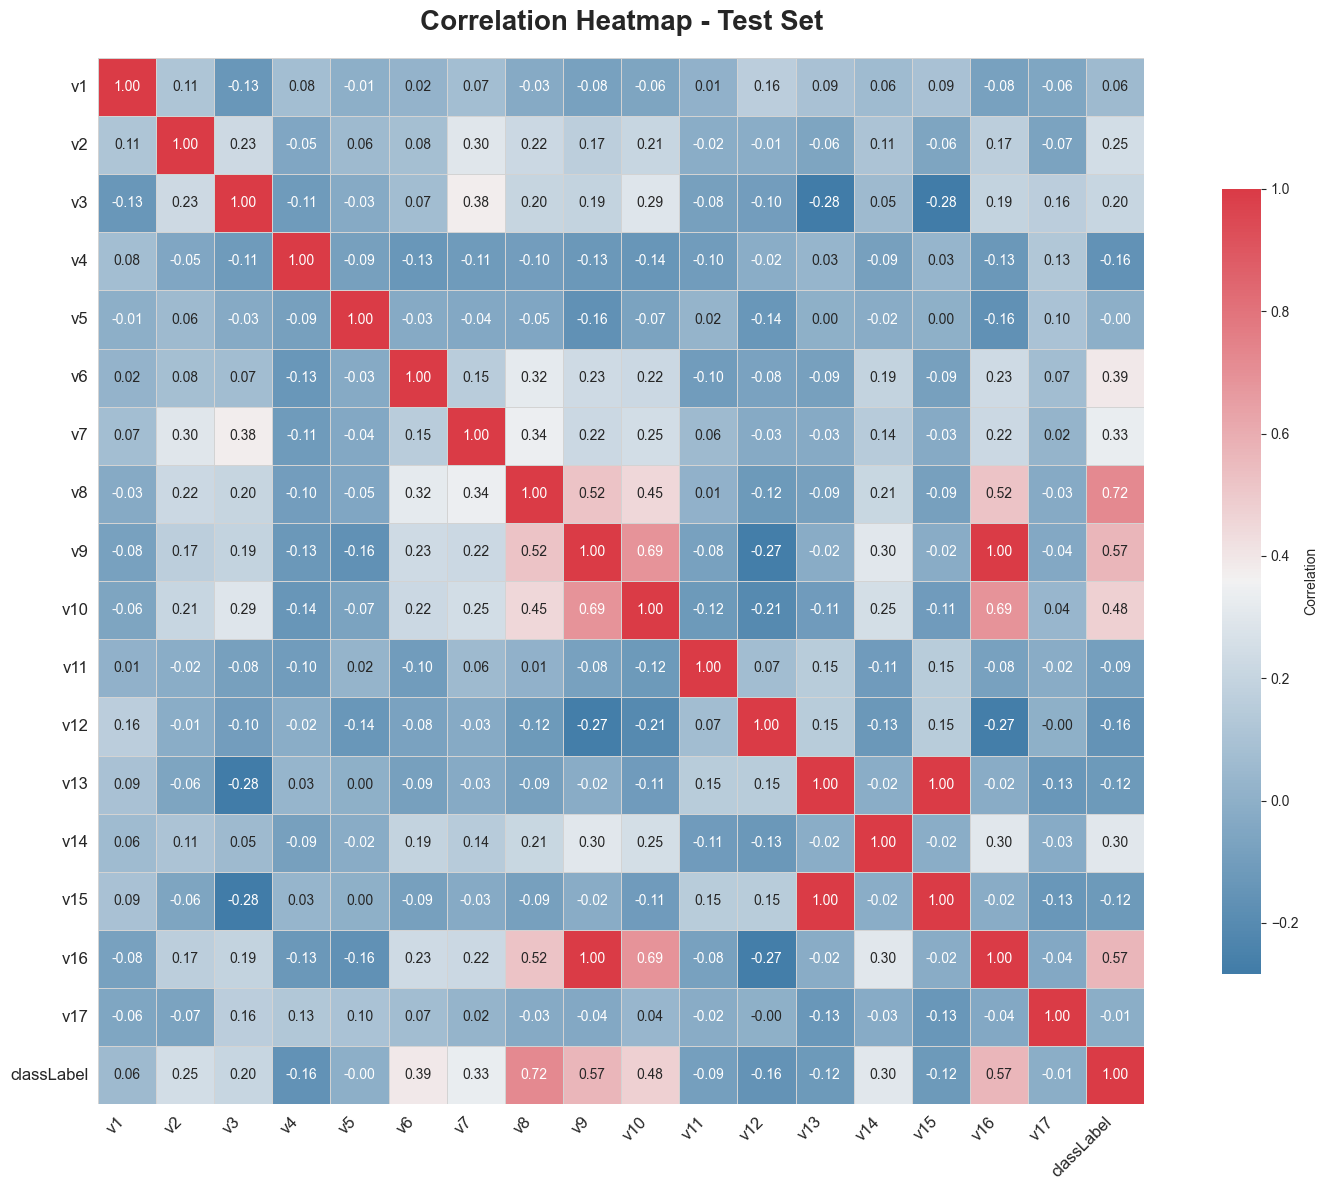

In [897]:
plt.figure(figsize=(16, 12))
sns.set_style("whitegrid")

# Correlation matrix + diverging palette
cmap = sns.diverging_palette(240, 10, as_cmap=True)

sns.heatmap(
    test_final.corr(),
    annot=True,
    fmt=".2f",
    cmap=cmap,
    linewidths=0.5,
    linecolor='lightgray',
    square=True,
    cbar_kws={'shrink': 0.75, 'label': 'Correlation'},
    annot_kws={'fontsize': 10}
)

plt.title("Correlation Heatmap - Test Set", fontsize=20, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()


In [898]:
X_test = test_final.drop(['classLabel', 'v17', 'v16', 'v15'], axis=1, errors='ignore')
y_test = test_final['classLabel']

In [899]:
y_pred_test = rfc_best.predict(X_test)

### Final Remarks on Test Results

- Honestly, these results are good but not the best; I'm not entirely satisfied.
- More fine-tuning might help, or perhaps the dataset isn't comprehensive enough.
- Without knowing the data's origin, there could be inherent biases.



=== Test Evaluation ===
          Predicted A  Predicted T
Actual A           77           30
Actual T            5           88
              precision    recall  f1-score   support

           0       0.94      0.72      0.81       107
           1       0.75      0.95      0.83        93

    accuracy                           0.82       200
   macro avg       0.84      0.83      0.82       200
weighted avg       0.85      0.82      0.82       200

Accuracy: 0.825
Mean Absolute Error: 0.175


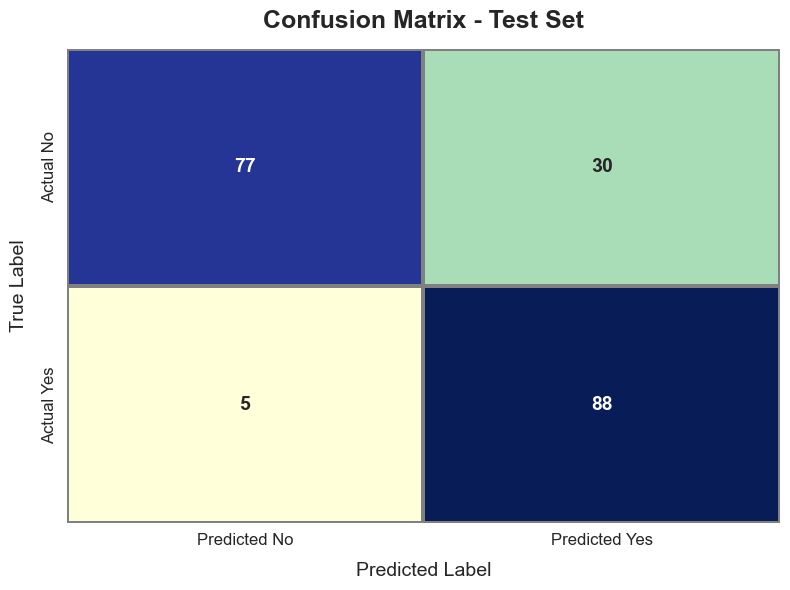

In [900]:
conf_mat_test = confusion_matrix(y_test, y_pred_test)
print("\n=== Test Evaluation ===")
print(pd.DataFrame(conf_mat_test, columns=["Predicted A", "Predicted T"], index=["Actual A","Actual T"]))
print(classification_report(y_test, y_pred_test))
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_test))

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Heatmap with better colors, fonts, grid lines, and labels
sns.heatmap(
    conf_mat_test,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    cbar=False,
    linewidths=1.5,
    linecolor='gray',
    xticklabels=["Predicted No", "Predicted Yes"],
    yticklabels=["Actual No", "Actual Yes"],
    annot_kws={"fontsize": 14, "fontweight": "bold"}
)

plt.title("Confusion Matrix - Test Set", fontsize=18, fontweight='bold', pad=15)
plt.xlabel("Predicted Label", fontsize=14, labelpad=10)
plt.ylabel("True Label", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


### Evaluate Imputation Methods

This cell evaluates imputation by randomly masking cells and comparing the imputed values to the original ones using mean squared difference:

$$
Error = (Imputed - Original)^2
$$

The results show that Iterative imputation is the most reliable among the three methods, though it's not perfect.


In [903]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

def evaluate_imputation_methods_all(df, eval_cols, methods, num_samples=50, random_state=42):
   
    np.random.seed(random_state)
    
    available_cells = []
    for col in eval_cols:
        valid_idx = df[df[col].notnull()].index.tolist()
        available_cells.extend([(idx, col) for idx in valid_idx])
    
    sampled_indices = np.random.choice(len(available_cells), size=num_samples, replace=False)
    sampled_cells = [available_cells[i] for i in sampled_indices]
    
    original_values = {(idx, col): df.loc[idx, col] for (idx, col) in sampled_cells}
    
    results = {}
    
    for method_name, method_func in methods.items():
        df_masked = df.copy()
        for (idx, col) in sampled_cells:
            df_masked.loc[idx, col] = np.nan
        
        df_imputed = method_func(df_masked)
        
        records = []
        
        for (idx, col) in sampled_cells:
            orig_val = original_values[(idx, col)]
            imp_val  = df_imputed.loc[idx, col]
            if np.issubdtype(type(orig_val), np.number):
                squared_diff = (imp_val - orig_val) ** 2
            else:
                squared_diff = 0 if imp_val == orig_val else 1
            
            records.append({
                "Row": idx,
                "Column": col,
                "Original": orig_val,
                "Imputed": imp_val,
                "Squared_Diff": squared_diff
            })
        
        comparison_df = pd.DataFrame(records)
        print(f"\n--- Comparison for {method_name} Imputation ---")
        print(comparison_df)
        
        mean_squared_diff = comparison_df["Squared_Diff"].mean()
        results[method_name] = mean_squared_diff
        print(f"\nMethod: {method_name} | Mean Squared Difference: {mean_squared_diff:.4f}\n")
    
    return results

def impute_full_iterative(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    df_numeric = impute_numeric_iterative(df.copy(), numeric_cols)
    df_categorical = impute_categorical_ml(df.copy(), categorical_cols, target_variable)
    return combine_imputed(df_numeric, df_categorical, categorical_cols)

def impute_full_knn(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    df_numeric = impute_numeric_knn(df.copy(), numeric_cols)
    df_categorical = impute_categorical_ml(df.copy(), categorical_cols, target_variable)
    return combine_imputed(df_numeric, df_categorical, categorical_cols)

def impute_full_single(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    df_numeric = single_imputation(df.copy())
    df_categorical = impute_categorical_ml(df.copy(), categorical_cols, target_variable)
    return combine_imputed(df_numeric, df_categorical, categorical_cols)

methods = {
    "Iterative": impute_full_iterative,
    "KNN": impute_full_knn,
    "Single": impute_full_single
}

eval_cols = [col for col in df_train.columns if col != target_variable]

results = evaluate_imputation_methods_all(df_train.copy(), eval_cols, methods, num_samples=1000, random_state=42)
print("\nOverall Results:", results)



--- Comparison for Iterative Imputation ---
      Row Column  Original      Imputed  Squared_Diff
0    2501    v14      1583   787.473536  6.328624e+05
1    1942    v13     100.0    99.999814  3.465141e-08
2     388    v12         g            g  0.000000e+00
3    1882     v5 -0.739718    -0.113838  3.917258e-01
4    3539     v1         b            b  0.000000e+00
..    ...    ...       ...          ...           ...
995  1046     v3    0.0001     0.000333  5.410953e-08
996  2556    v14         0  1684.994033  2.839205e+06
997  2077    v13     160.0   159.999797  4.114567e-08
998   793     v3    0.0003     0.000523  4.962291e-08
999   854    v13       0.0    -0.000251  6.280867e-08

[1000 rows x 5 columns]

Method: Iterative | Mean Squared Difference: 182590024.5543


--- Comparison for KNN Imputation ---
      Row Column  Original   Imputed  Squared_Diff
0    2501    v14      1583    1583.0      0.000000
1    1942    v13     100.0     100.0      0.000000
2     388    v12         g  